In [1]:
import os
import json
import numpy as np
import pandas as pd

In [9]:
df_ztfrest = pd.read_csv('ZTFReST.csv')
ztfredshifts = df_ztfrest.dropna(subset=["redshift"]).copy().reset_index(drop=True)

objIds = sorted(list(set(ztfredshifts["id"])))

In [15]:
data_folder = 'data/'
photometry_dict = {}


for root, dirs, files in sorted(os.walk(data_folder)):
    for file in files:
        if file == 'photometry.json':
            folder_name = os.path.basename(root)
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                photometry_dict[folder_name] = json.load(f)

In [16]:
lc_dict = {key: pd.DataFrame.from_dict(val) for key, val in photometry_dict.items()}

In [17]:
# Initialize an empty dictionary to store non-empty items
flc_dict = {}
elc_dict = {}

# Iterate over the items in lc_dict
for key, value in lc_dict.items():
    # Check if the value is not empty
    if not value.empty:
        # If the value is not empty, add it to the new dictionary
        flc_dict[key] = value
    else:
        # If the value is empty, print the key
        print(f"{key}")
        elc_dict[key] = value

# Now non_empty_lc_dict contains only the items from lc_dict that are not empty

print('number of non-empty lightcurves:', len(flc_dict))
print('number of empty lightcurves:', len(elc_dict))

194.94985-47.75
Swift-J002325.5-141701
Swift-J181727.0-192921
ZTF18abfcmjwm
ZTF18abianhw
ZTF18abukavnm
ZTF18abvkwlam
ZTF19aankdan
ZTF19aapuudk
ZTF19aasexmy
ZTF19abeyvoi
ZTF19abobxik
ZTF19abrpfps
ZTF19abuvqgw
ZTF19acaxbjt
ZTF19acayojs
ZTF19accxzsc
ZTF20aaelulum
ZTF20aazrcbp
ZTF20ababxjv
ZTF20abmocba
ZTF20acigmelm
ZTF22abvvmti
number of non-empty lightcurves: 190
number of empty lightcurves: 23


In [18]:
best_cands = [
    "ZTF18aakuewf",
    "ZTF19aapfmki",
    "ZTF19aatesgp",
    "ZTF19abacxod",
    "ZTF19abxjrge",
    "ZTF19abyjzvd",
    "ZTF20aahfqpm",
    "ZTF20aakypiu",
    "ZTF20aaxhzhc",
    "ZTF20abwysqy",
    "ZTF20abwzqzo",
    "ZTF20acgigfo",
    "ZTF20acgiglu",
    "ZTF20aclfmwn",
    "ZTF20acozryr",
    "ZTF20actqnhg",
    "ZTF20acxouxk",
    "ZTF21aaabrpu",
    "ZTF21aabxjqr",
    "ZTF21aacxlgf",
    "ZTF21aajzfoq",
    "ZTF21aapkbav",
    "ZTF21abturbi",
    "ZTF21abuysnl",
    "ZTF21accyynu",
    "ZTF21aciosfu",
    "ZTF21acnjzwy",
    "ZTF22aaajecp",
    "ZTF22aaazhbd",
    "ZTF22aabvdtc",
    "ZTF22aahgvlx",
    "ZTF22aaigbnr",
    "ZTF22aajkkwd",
    "ZTF22aajrrzz",
    "ZTF22aanbmvf",
    "ZTF22aayluxo",
    "ZTF22aazmooy",
    "ZTF22abaowkz",
    "ZTF22abfxmpc",
    "ZTF22abntkbk",
    "ZTF22abtonmb",
    "ZTF22abuzpzz",
    "ZTF22abzucul",
    "ZTF23aaemgsd",
    "ZTF23aaenmcm",
    "ZTF23aaeozpp",
    "ZTF23aagunkc",
    "ZTF23aahnnrr",
    "ZTF23aaikakr",
    "ZTF23aaimsja",
    "ZTF23aaixebv",
    "ZTF23aajaxvk",
    "ZTF23aajazzg",
    "ZTF23aaljkky",
    "ZTF23aamibcp",
    "ZTF23aaoohpy",
    "ZTF23aarlxdf",
    "ZTF23aasxbqp",
    "ZTF23aauotrt",
    "ZTF23aavtwvs",
    "ZTF23abceaxk",
    "ZTF23abeqble",
    "ZTF23abgsmsg",
    "ZTF23abjwgre",
    "ZTF23abnpdod",
    "ZTF23abpxorf",
    "ZTF23absajre",
    "ZTF23absbqun",
    "ZTF24aafuvmu",
    "ZTF24aahkzvn"
]
bflc_dict = {key: value for key, value in flc_dict.items() if key in best_cands}

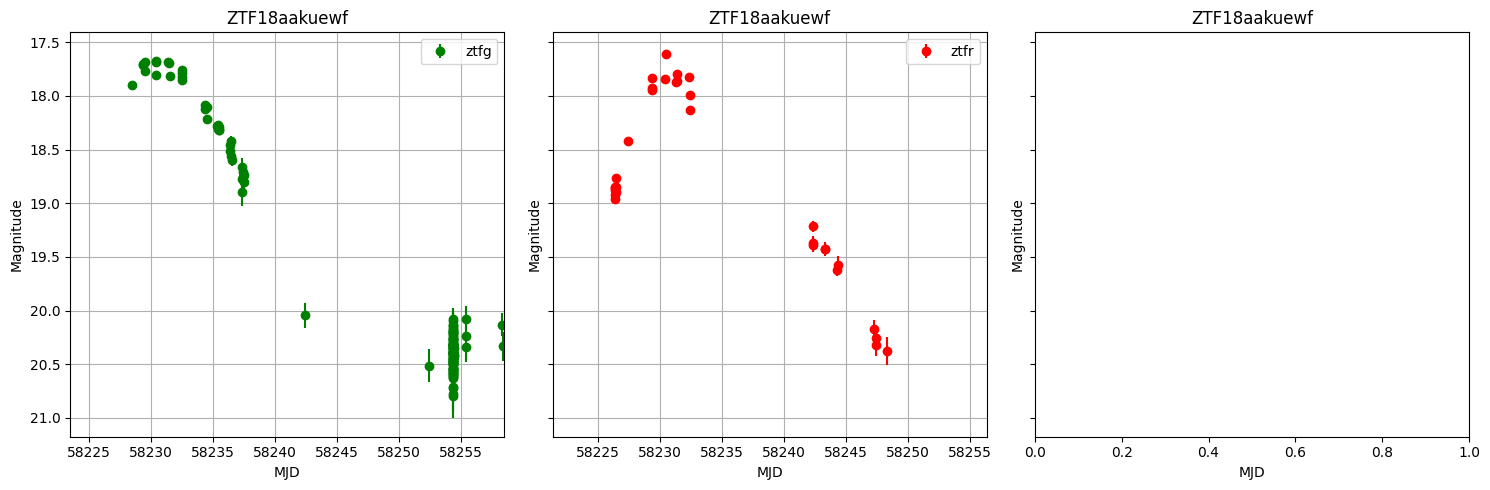

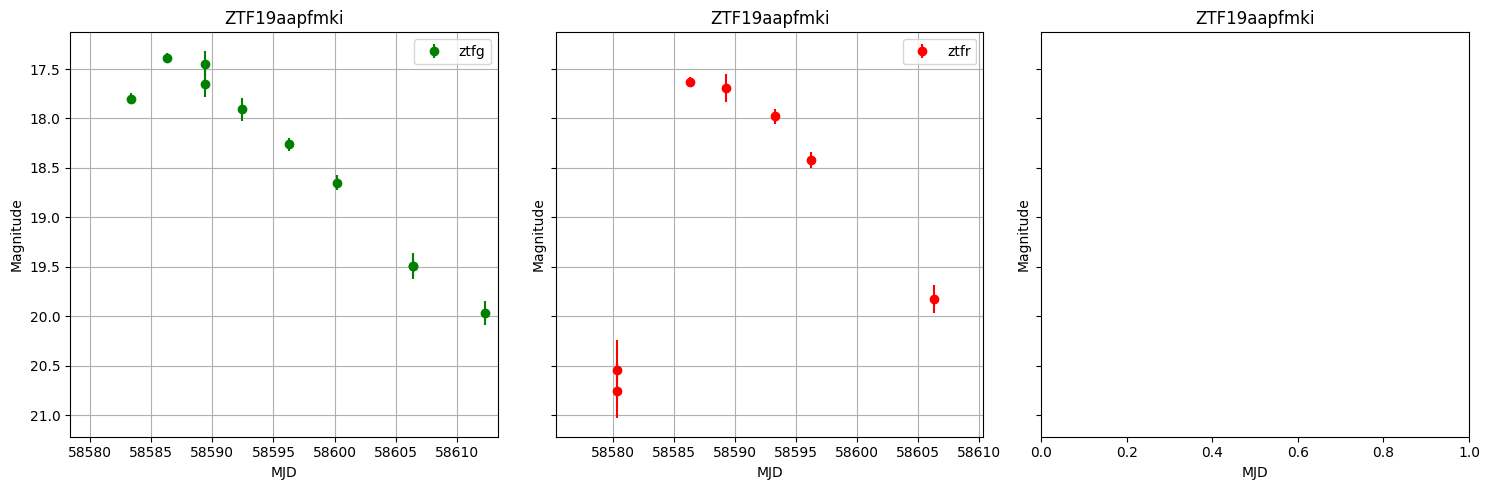

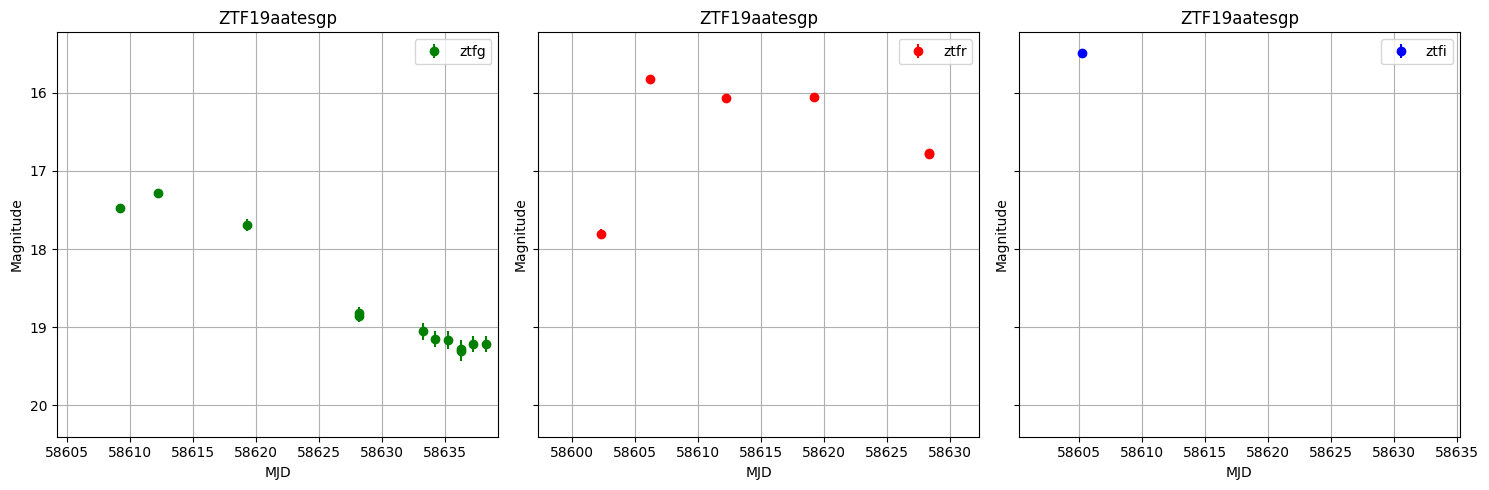

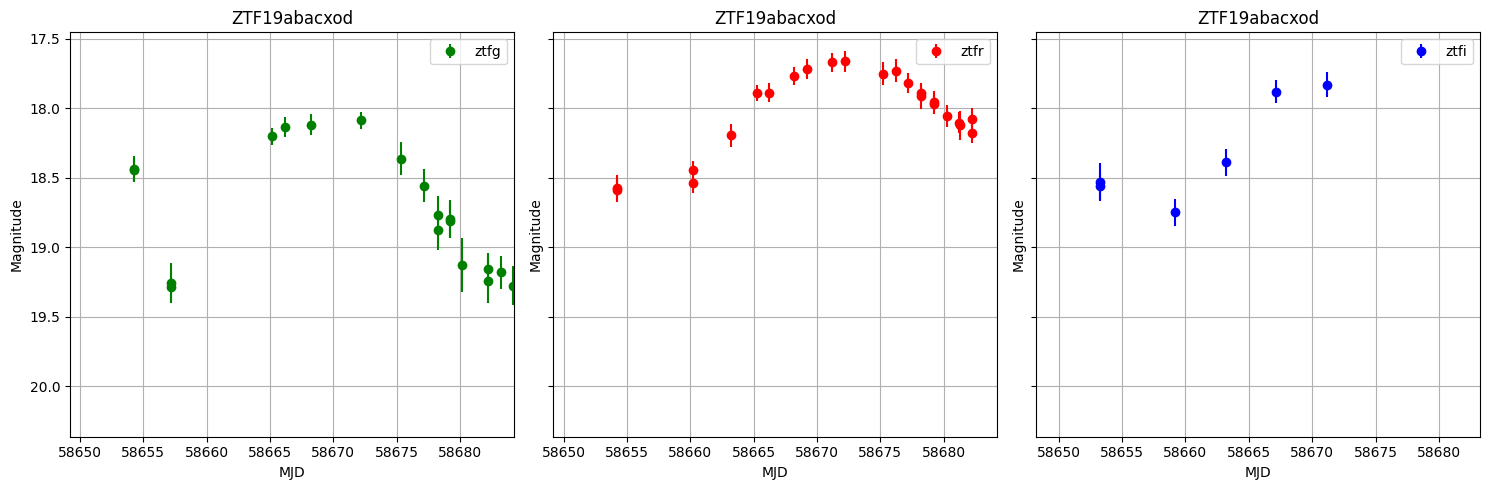

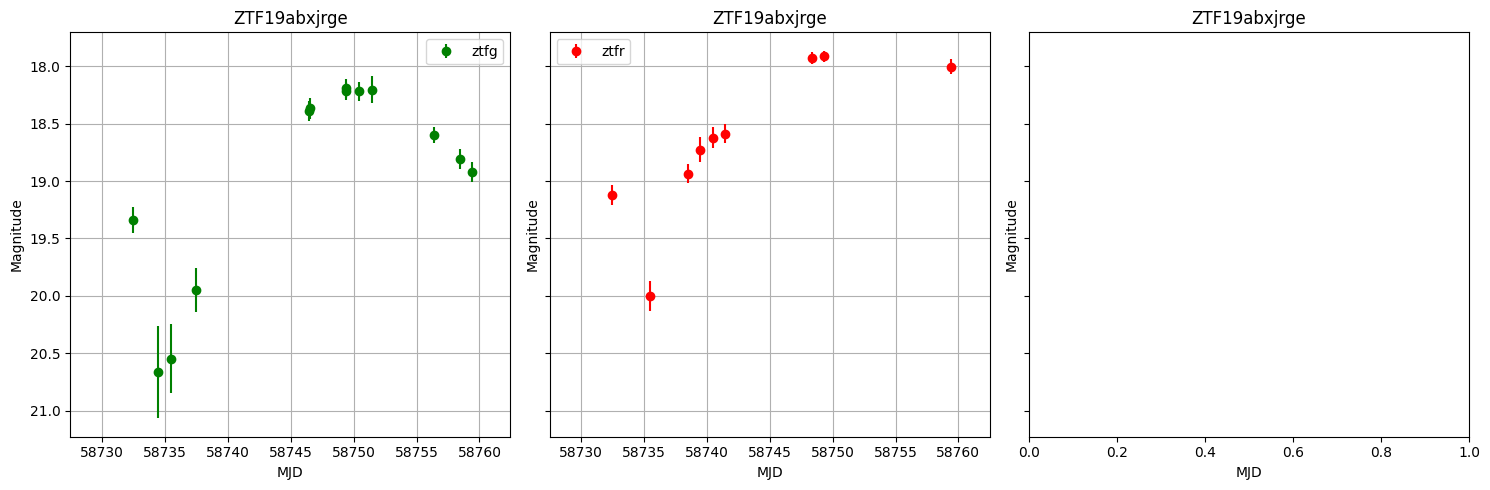

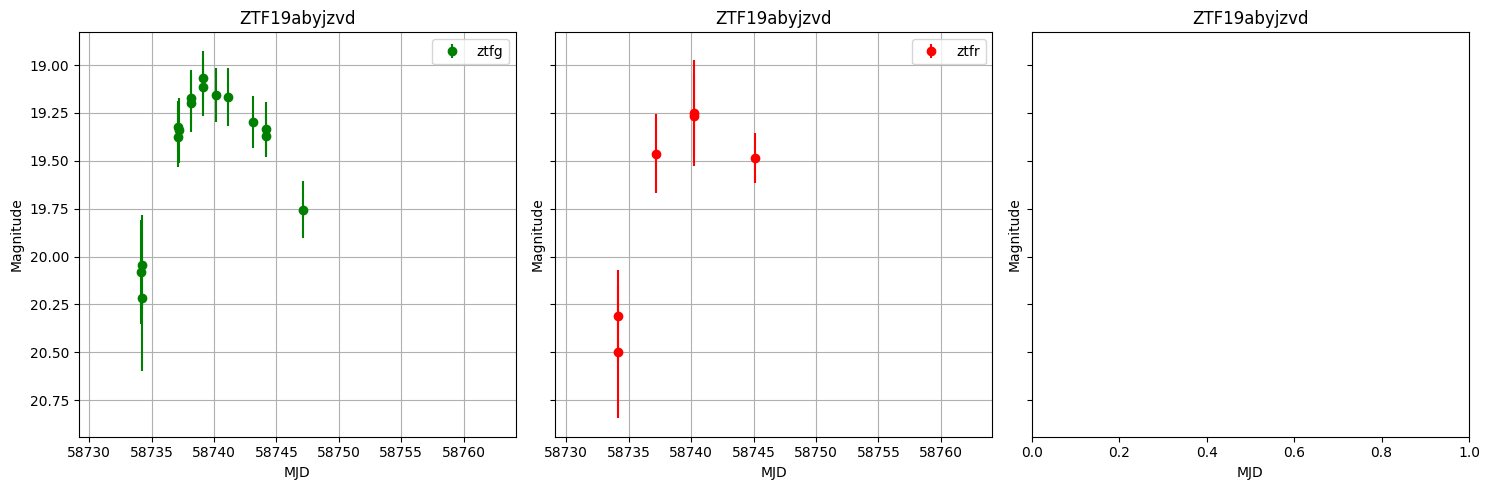

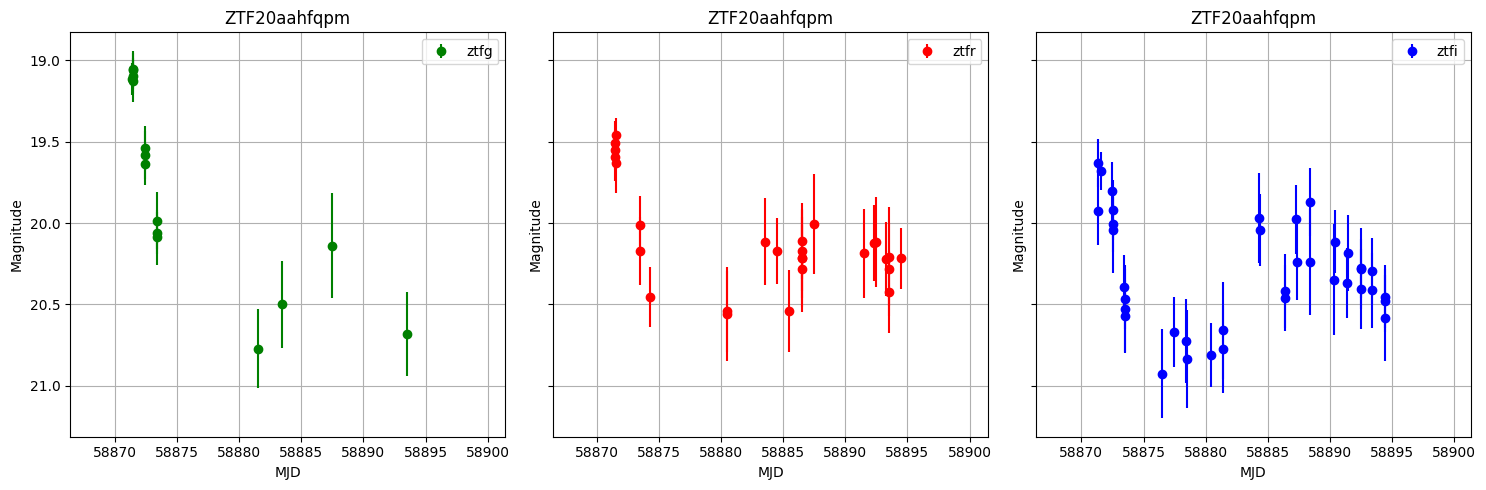

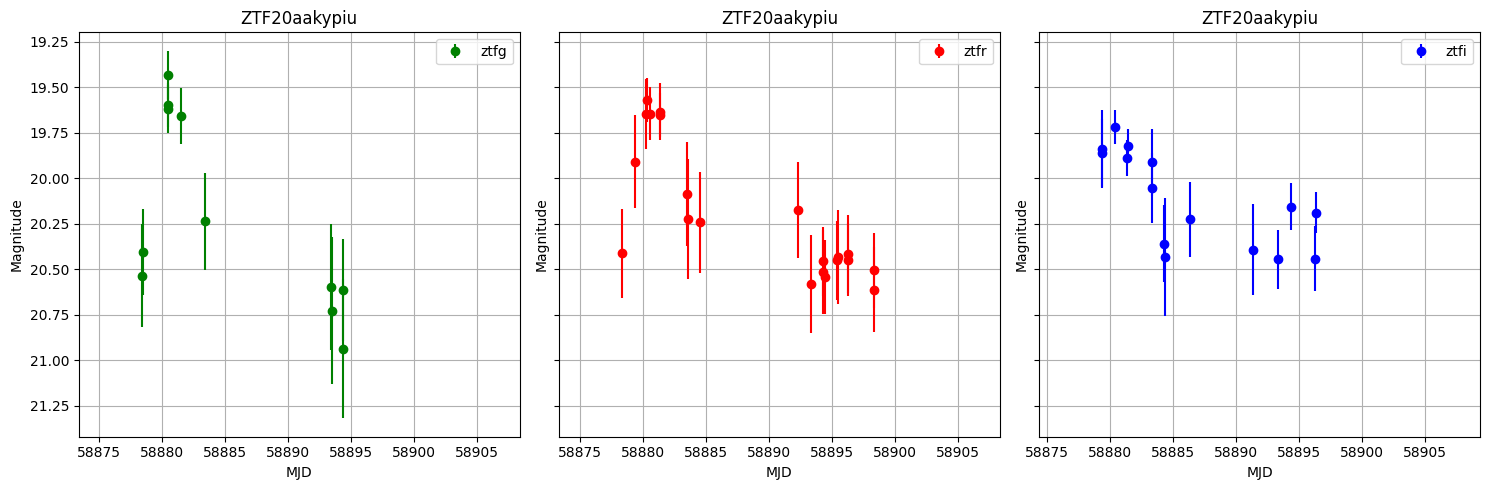

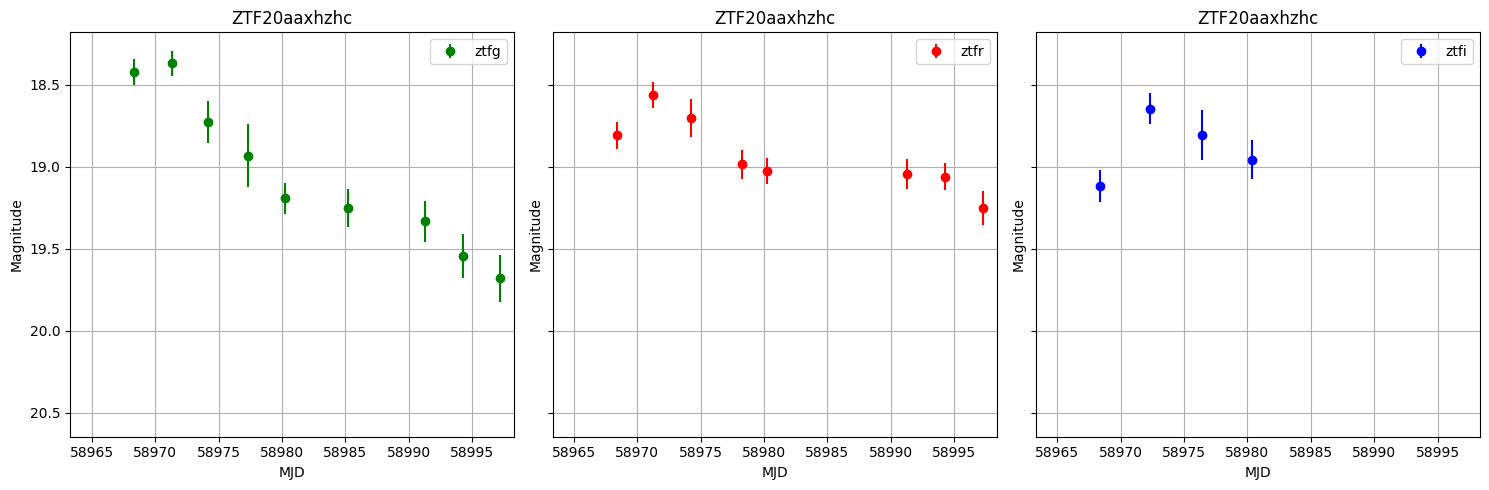

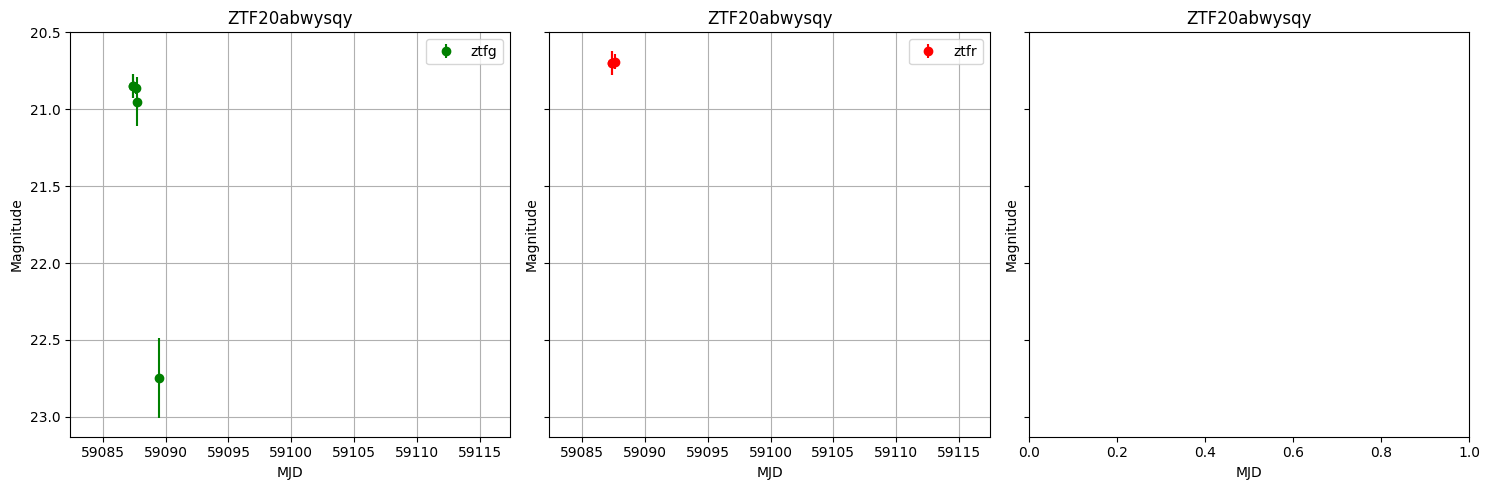

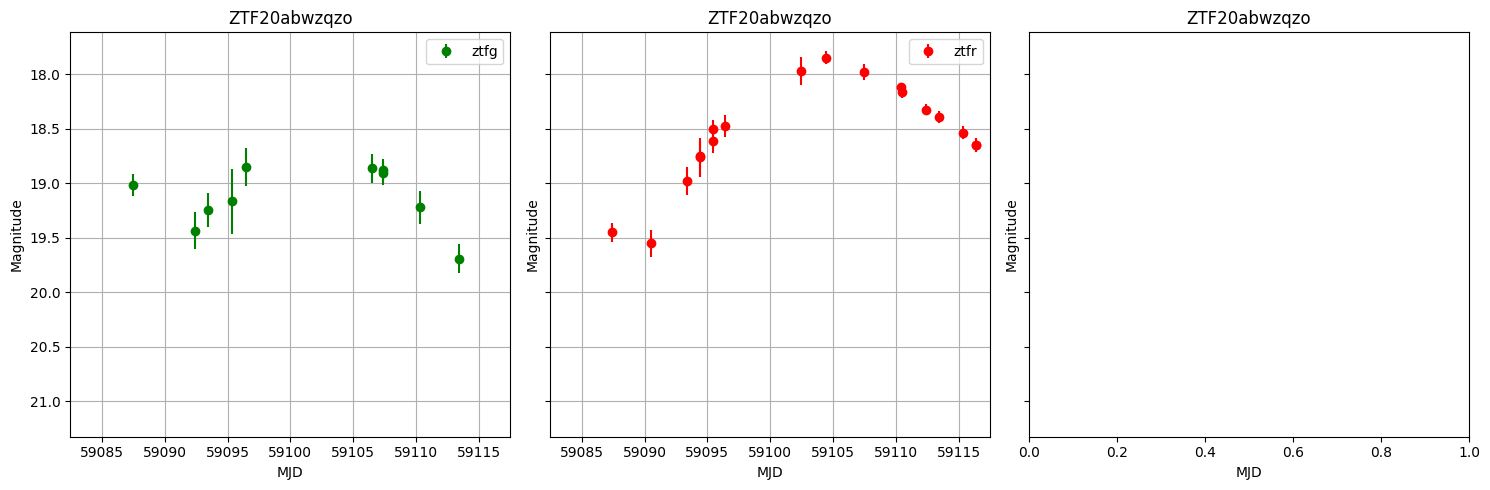

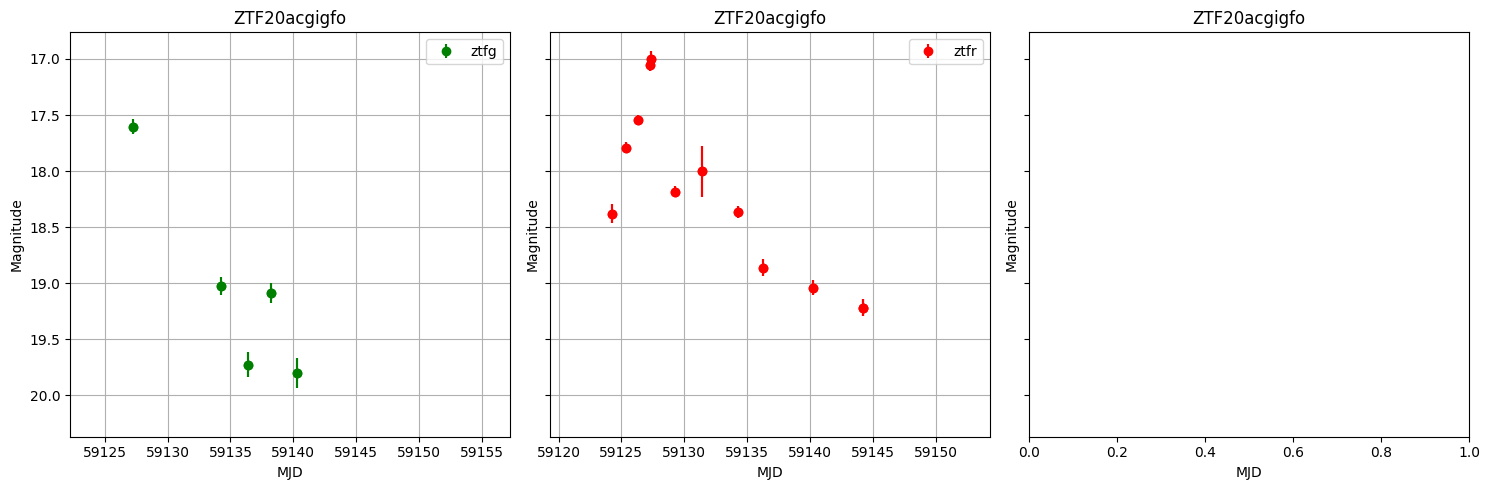

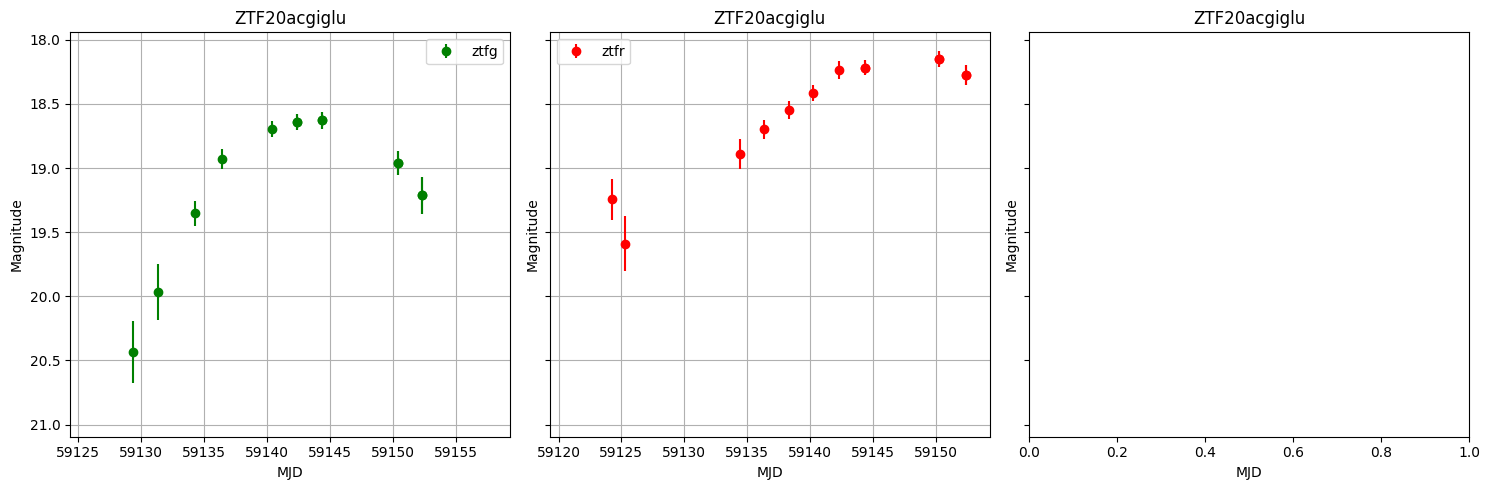

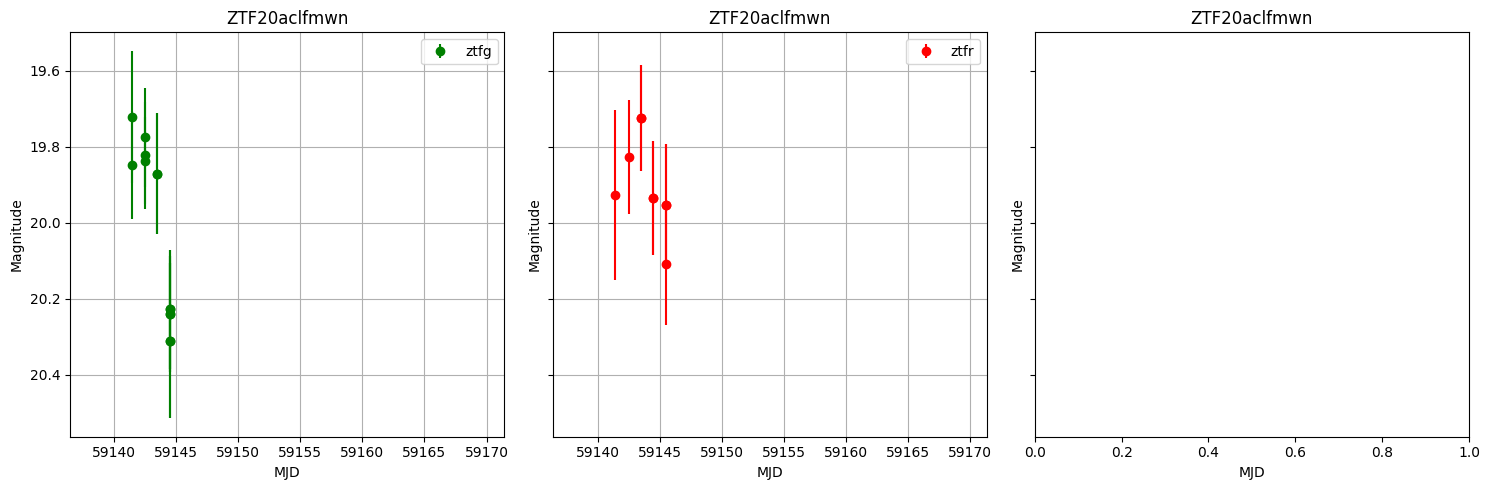

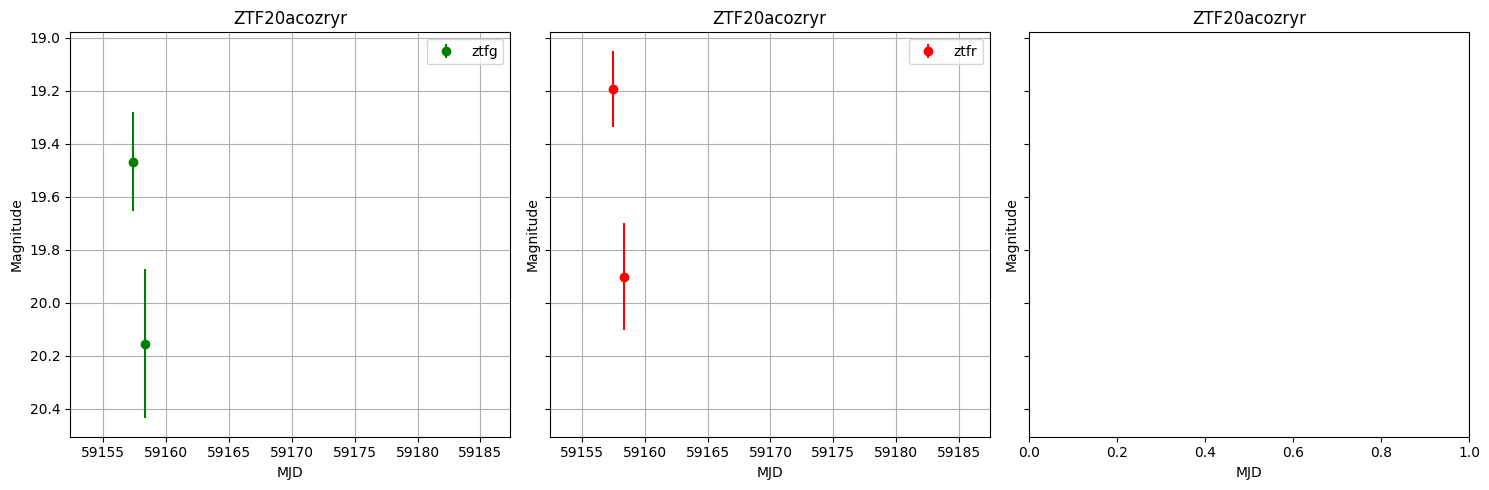

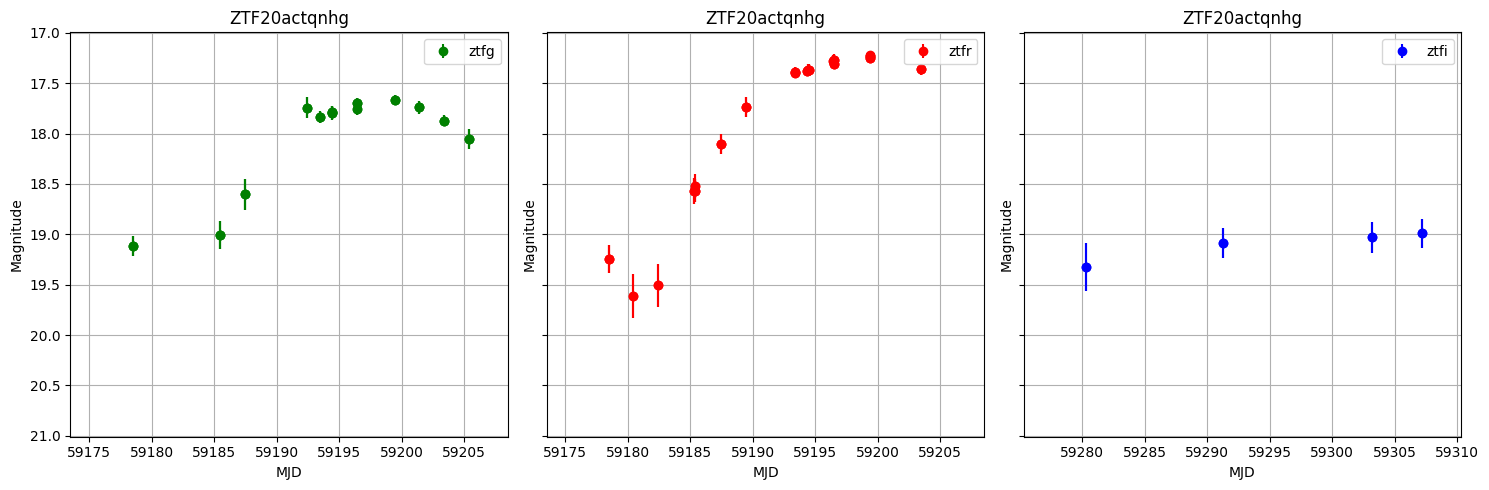

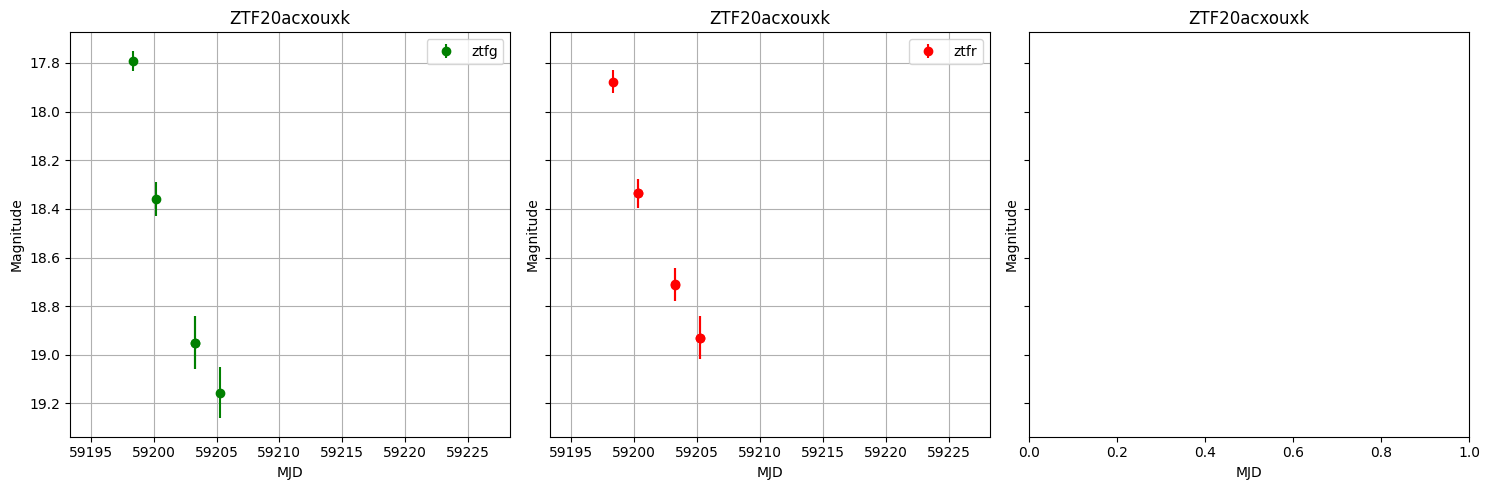

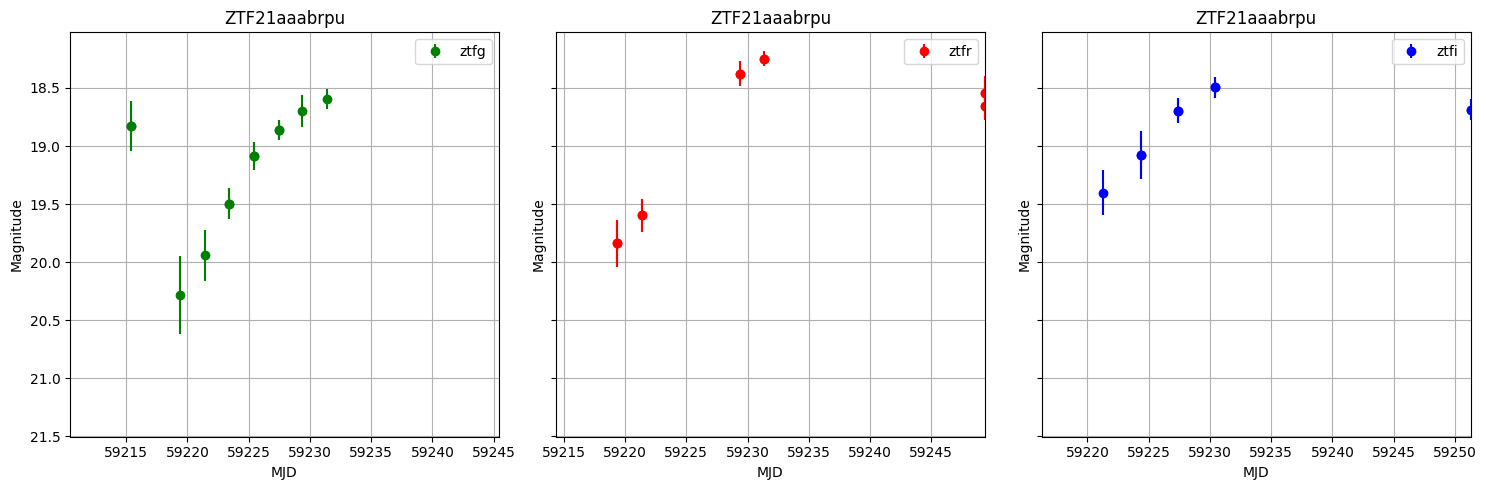

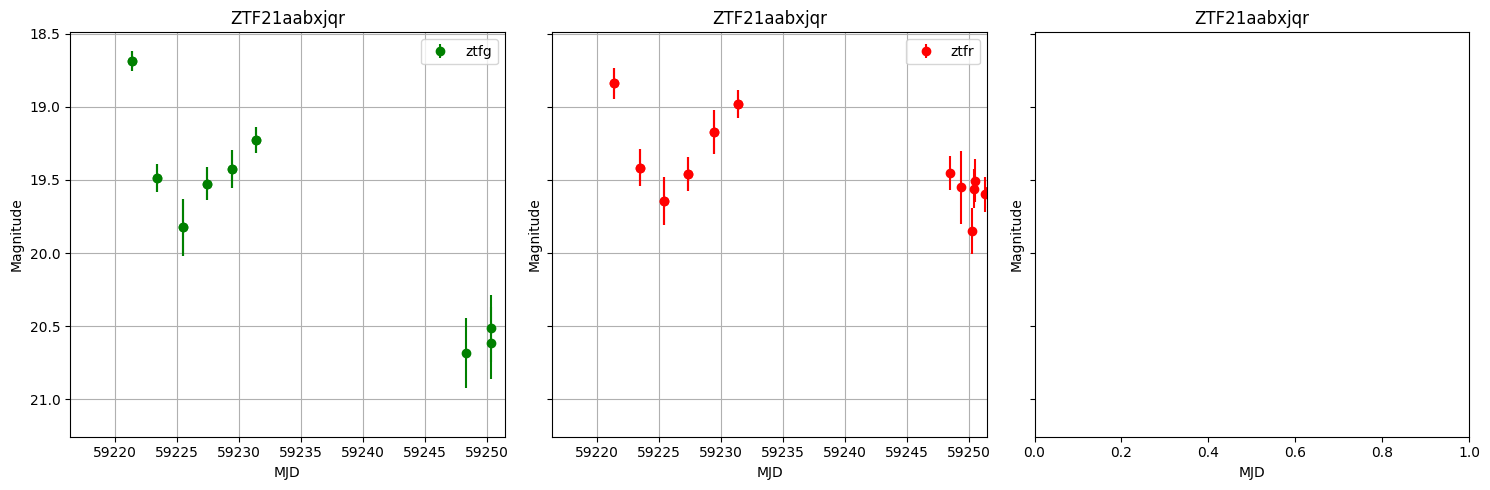

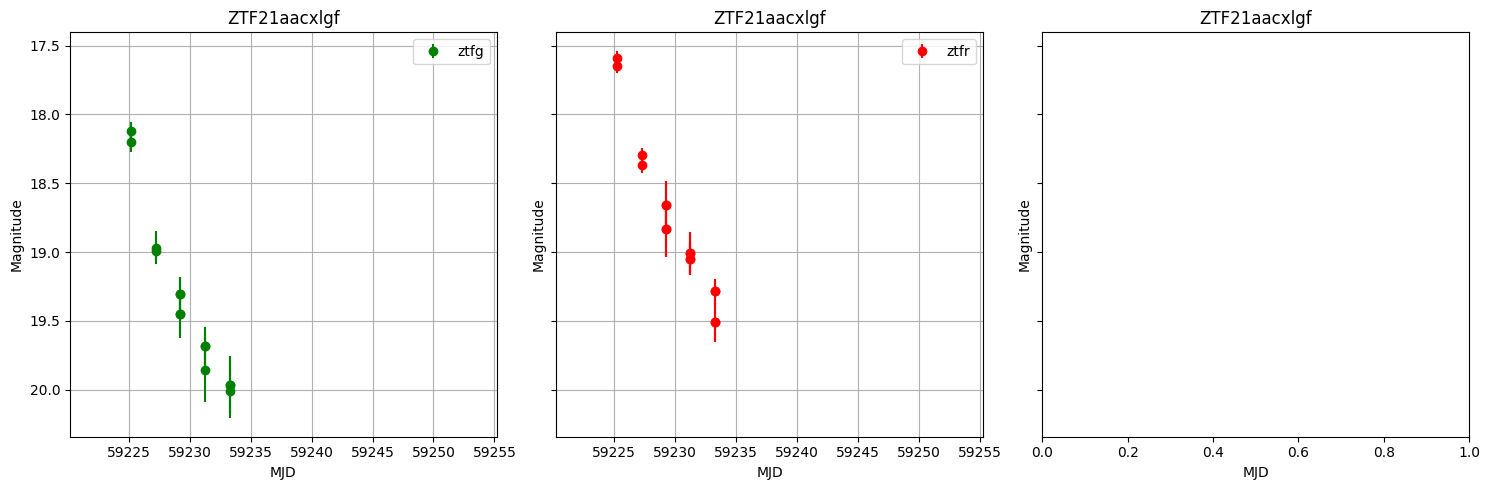

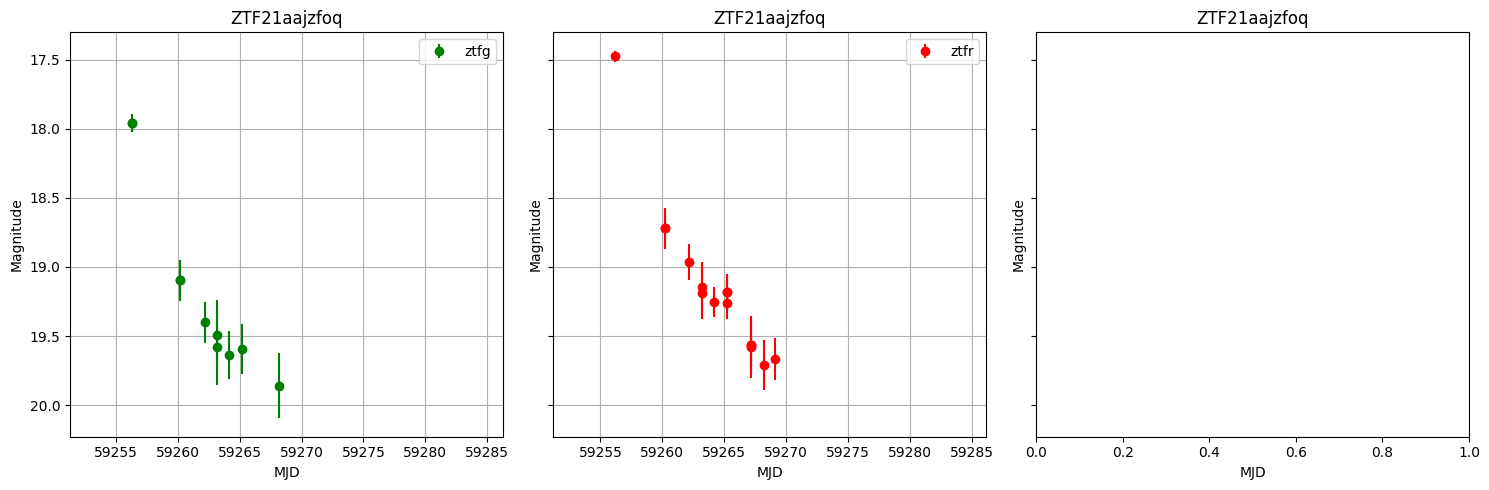

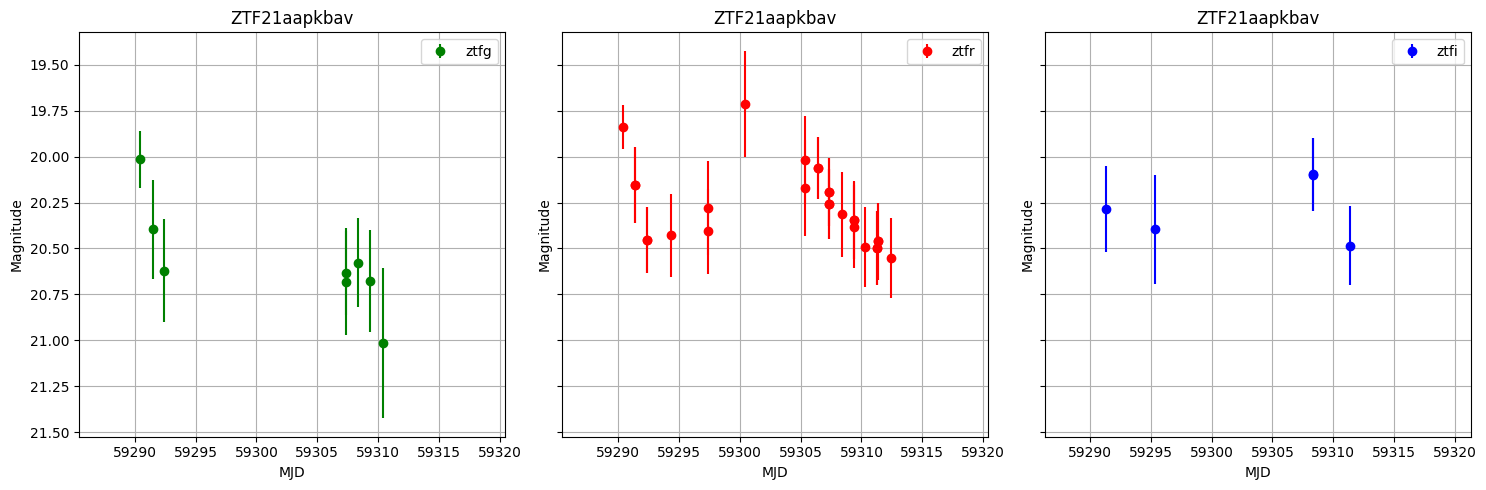

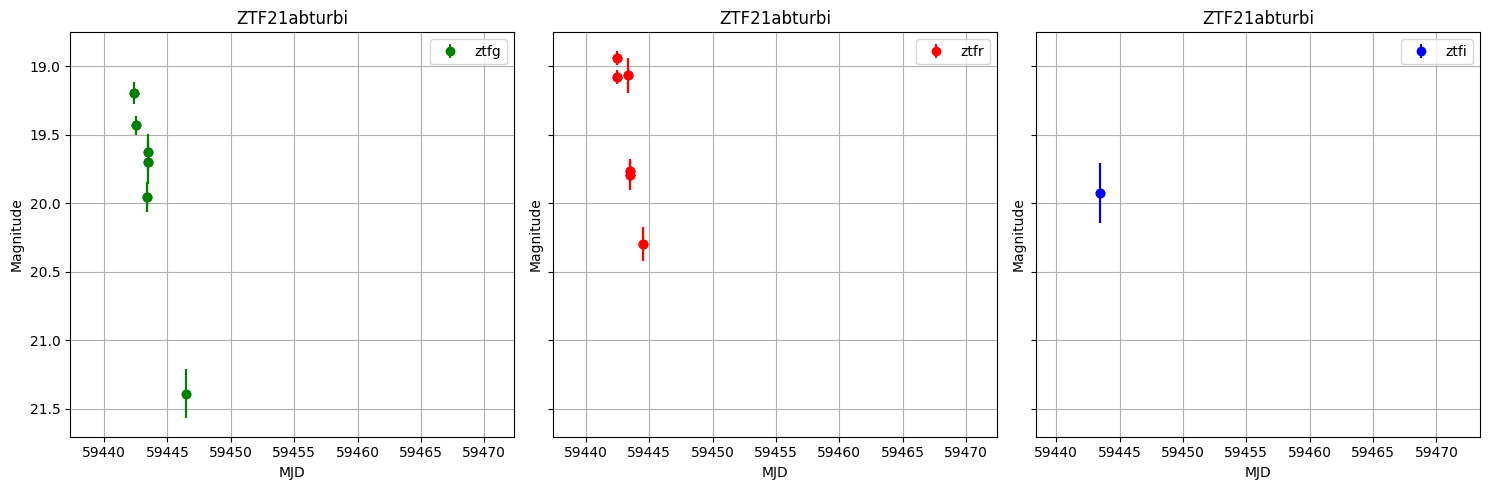

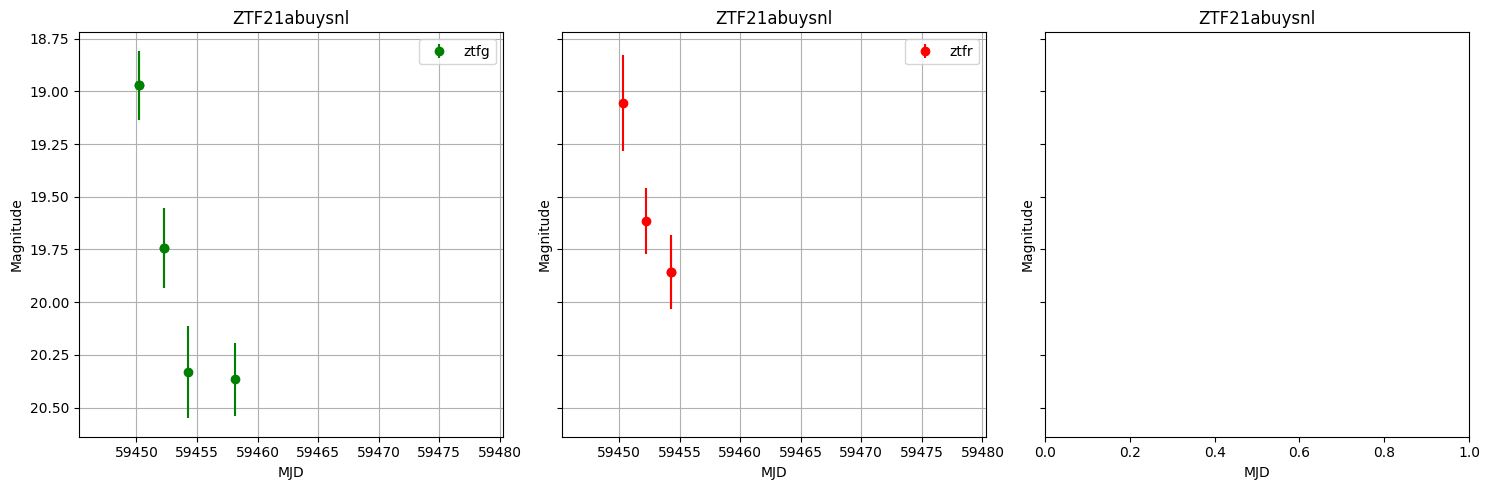

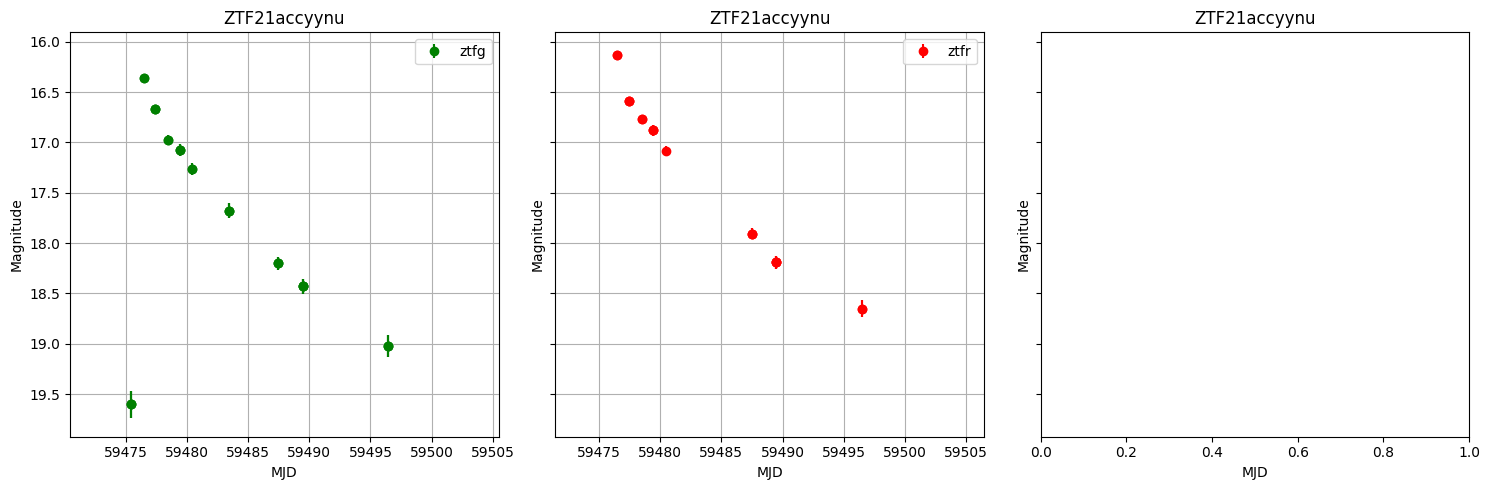

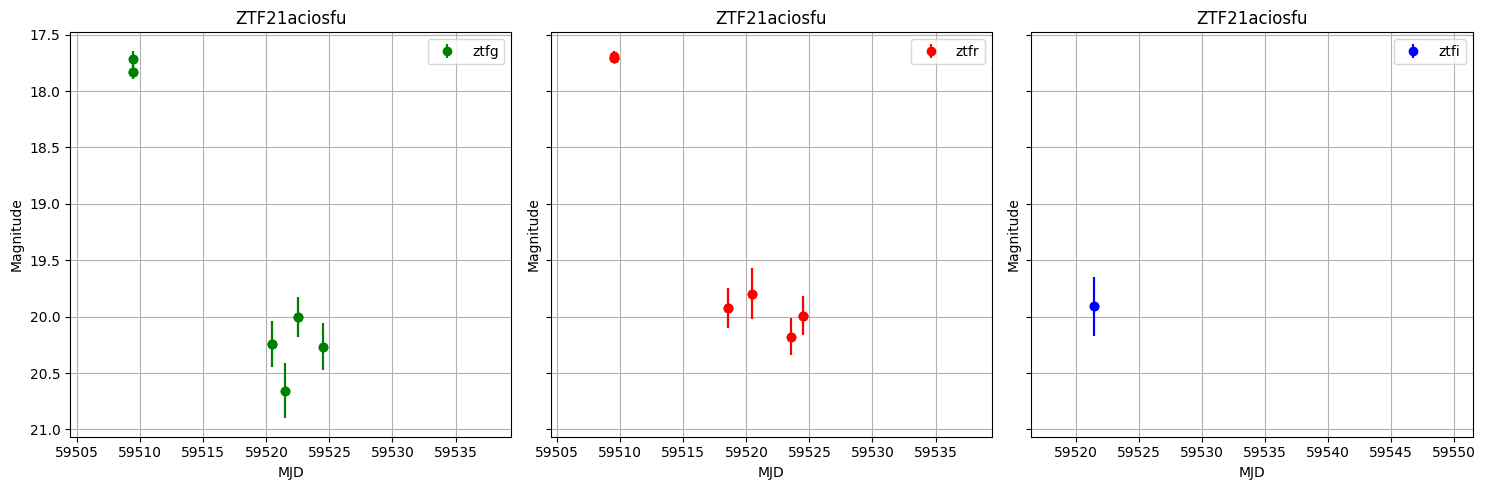

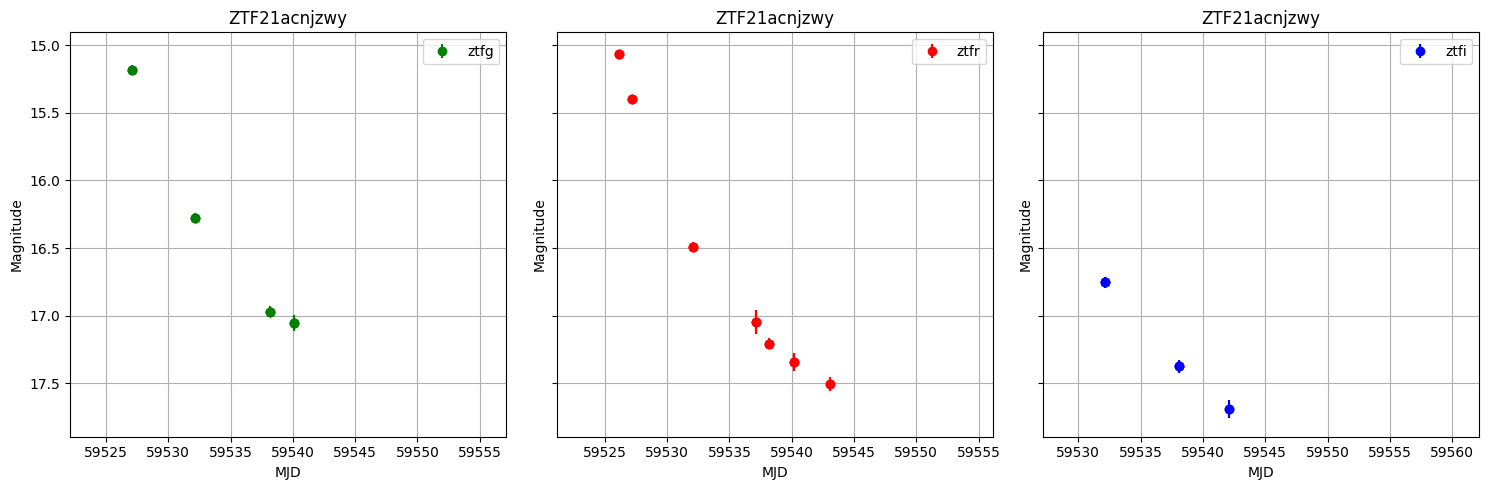

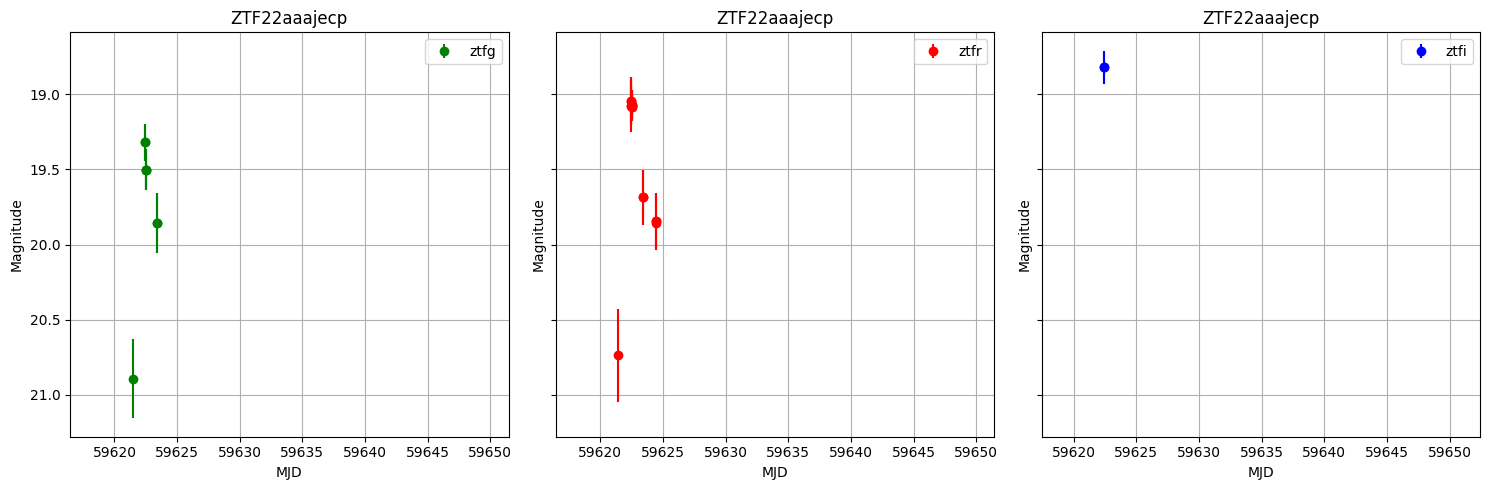

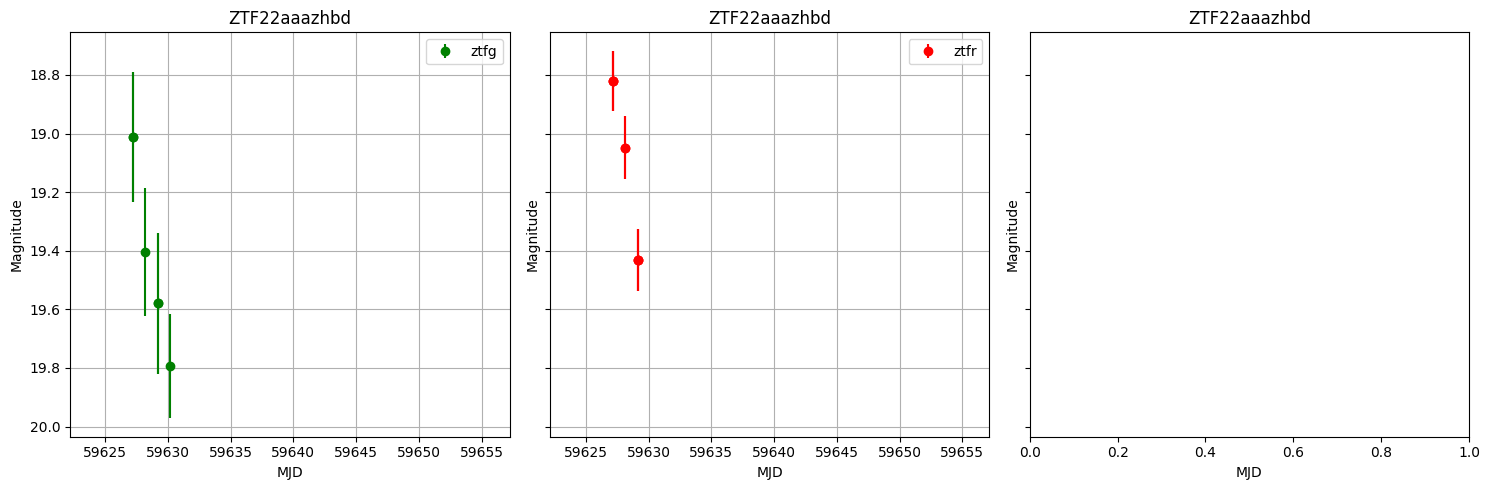

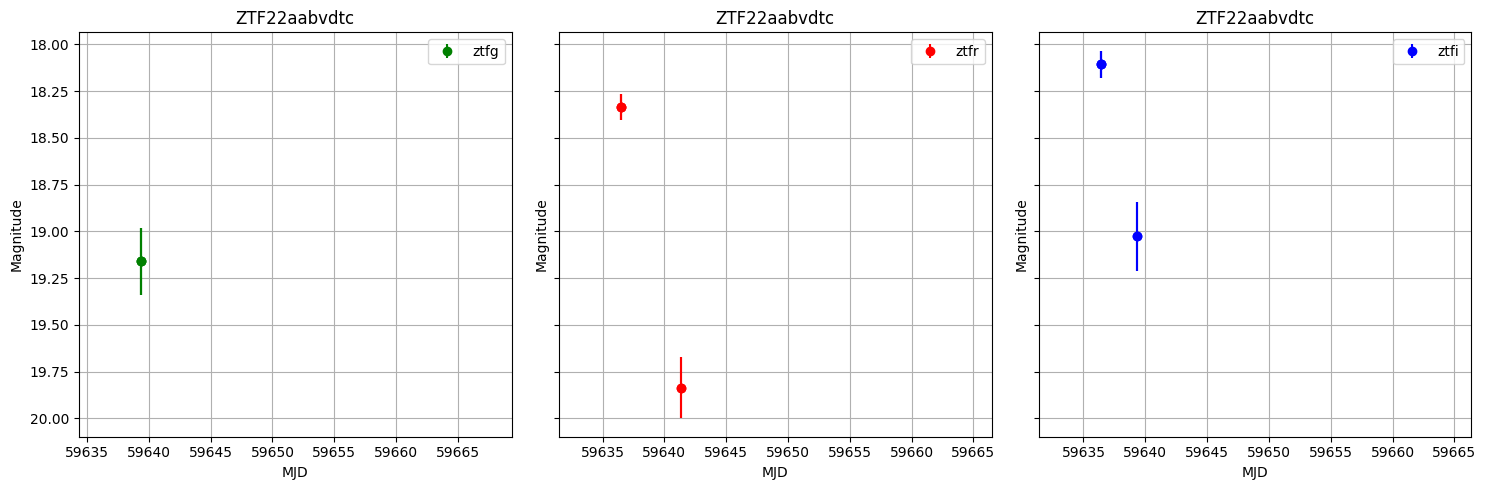

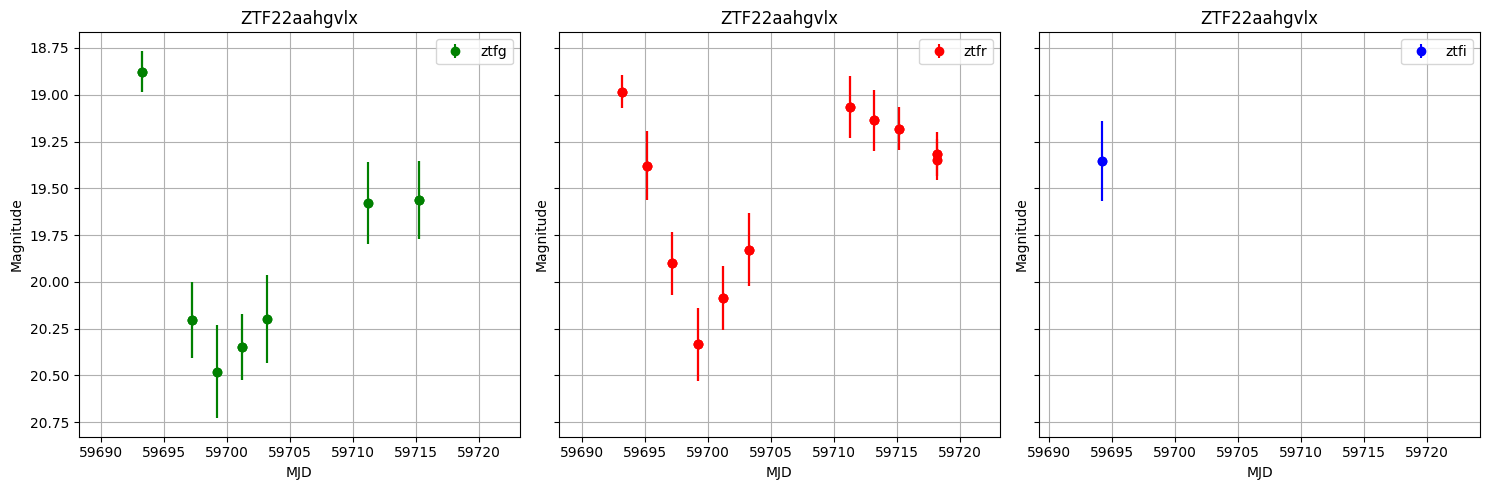

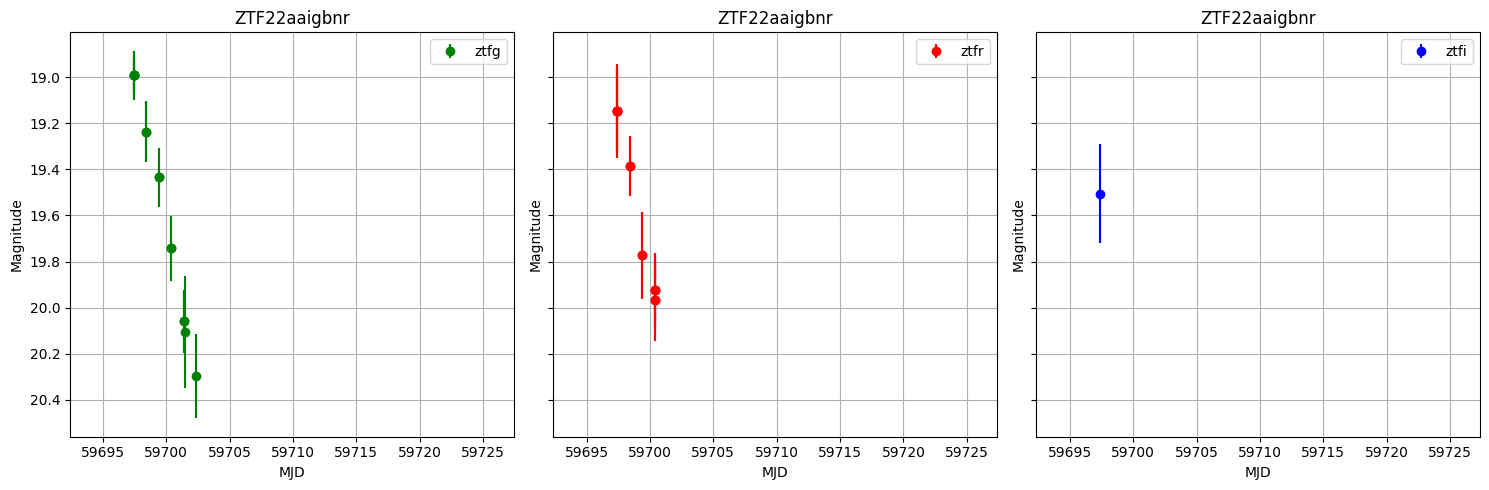

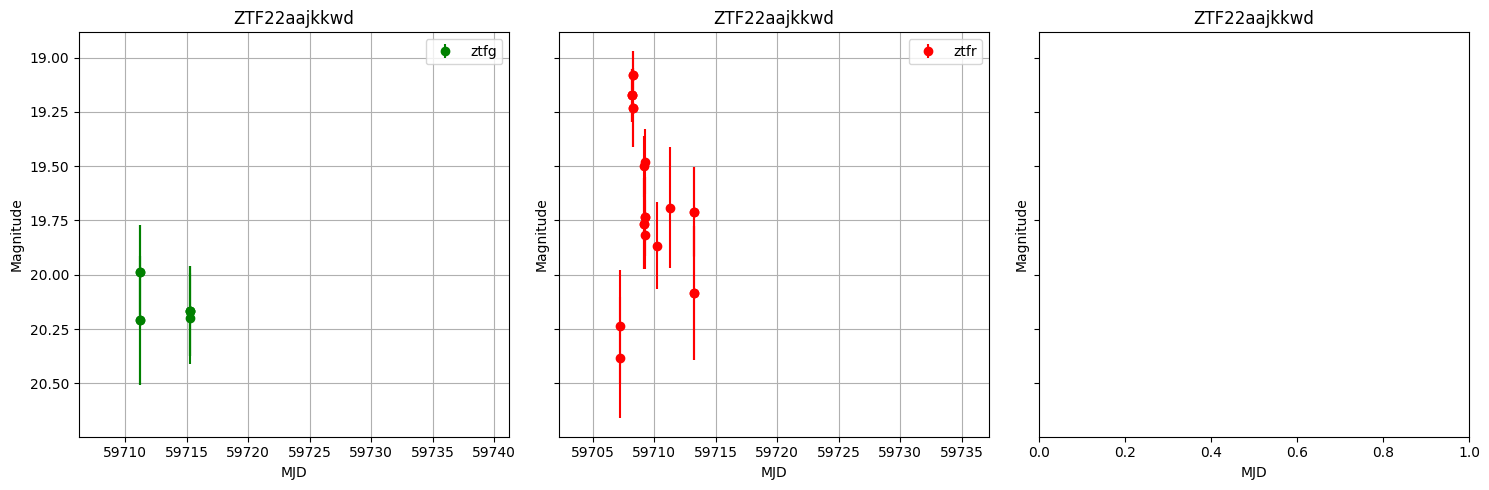

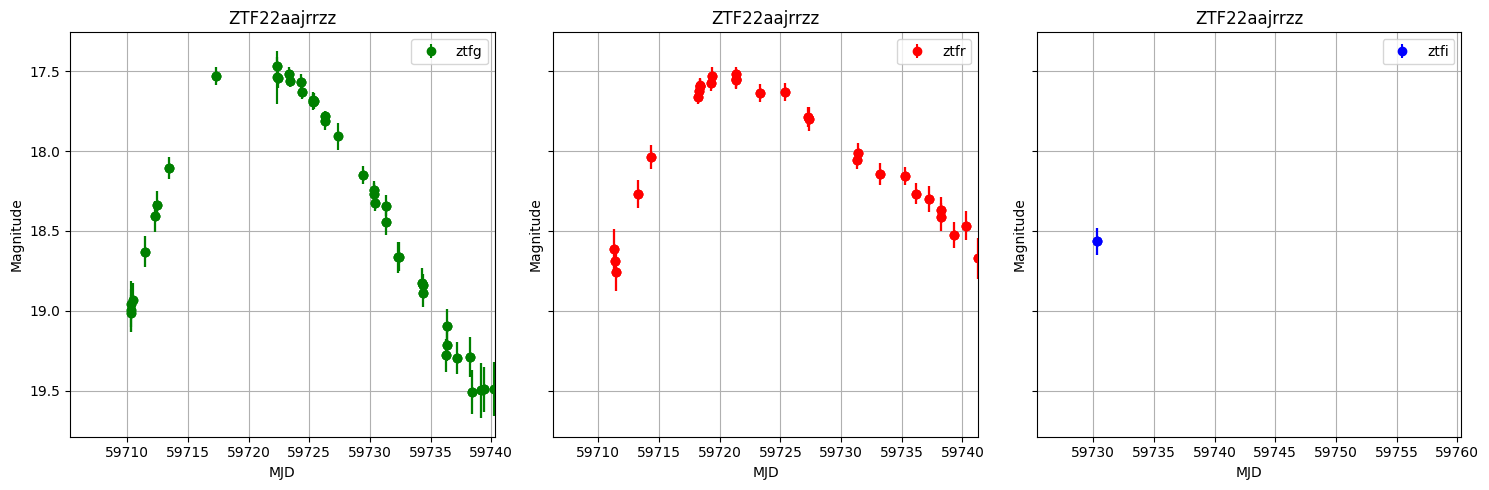

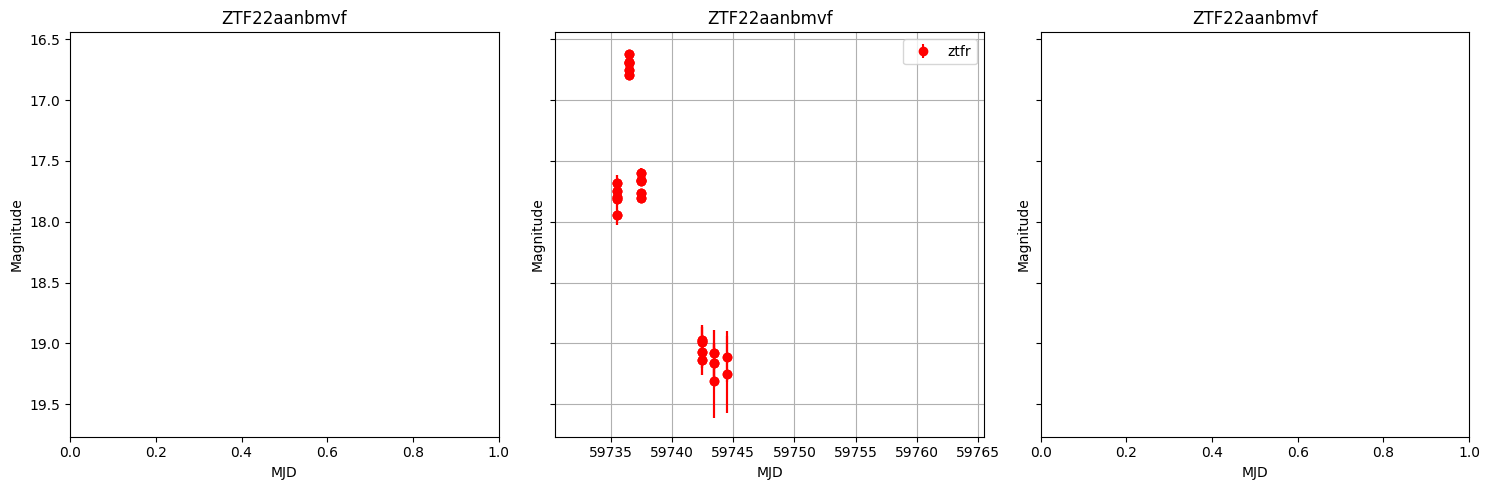

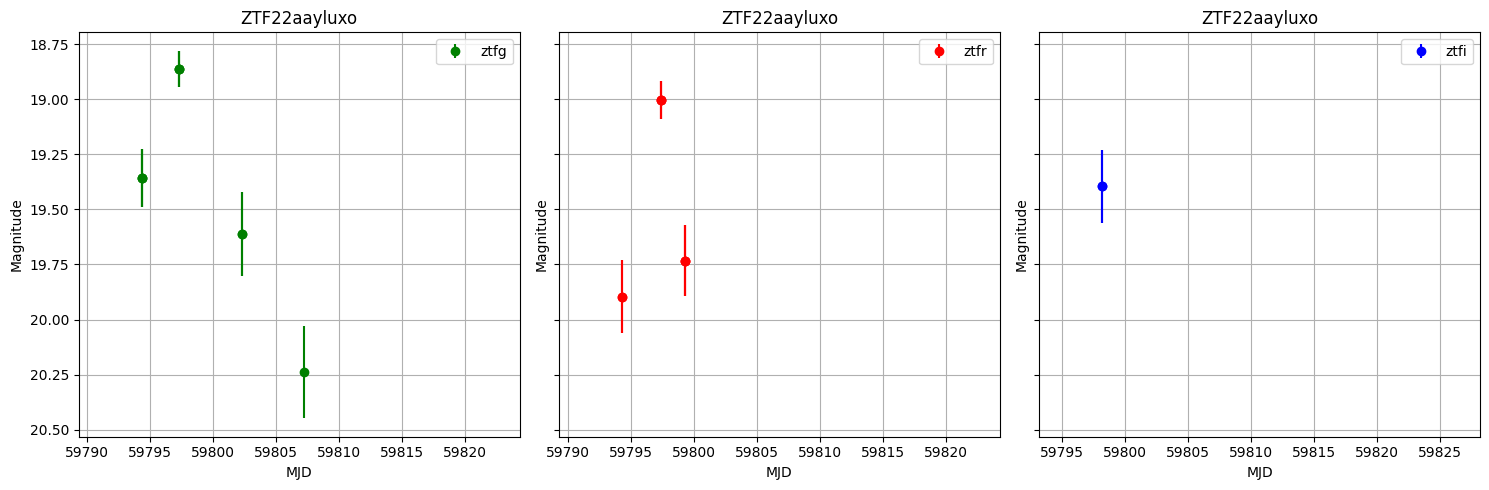

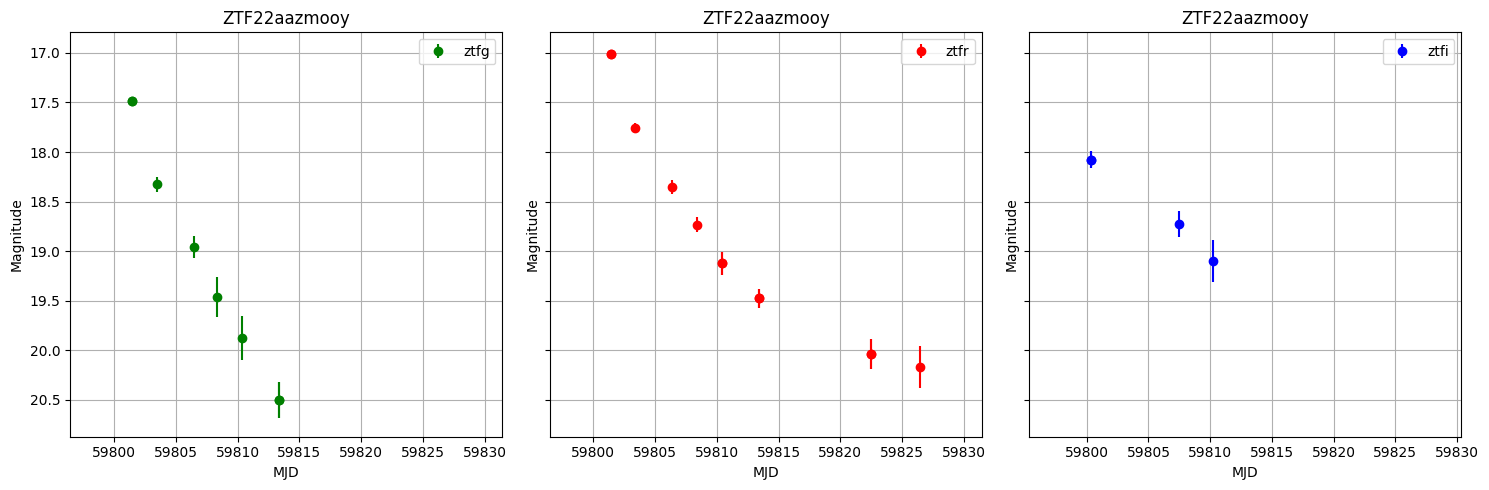

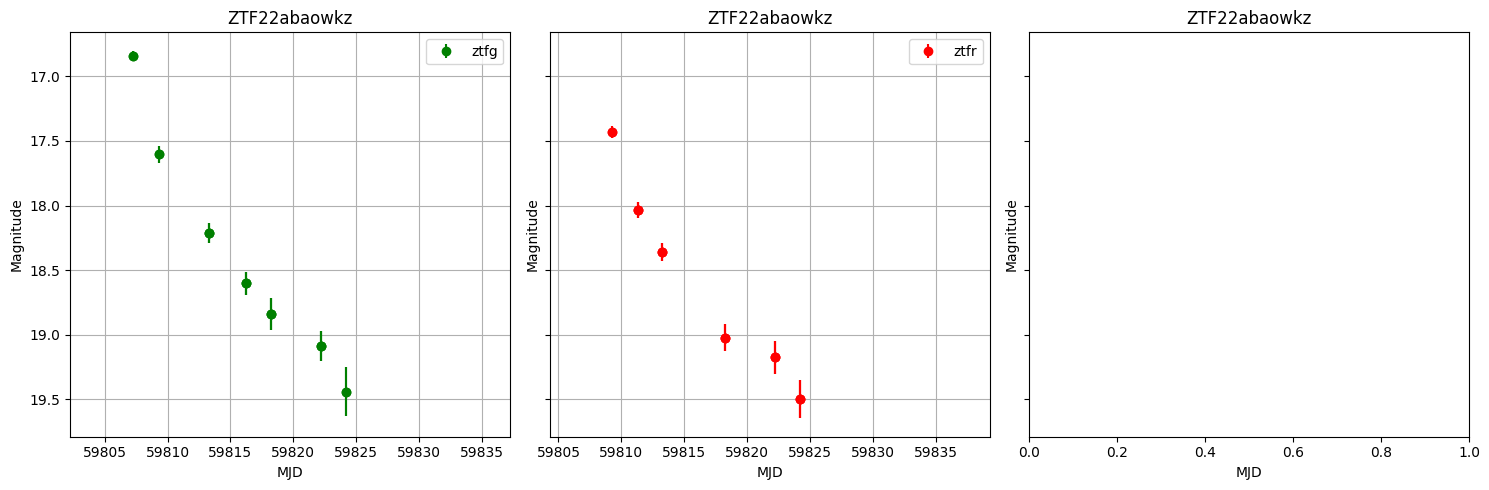

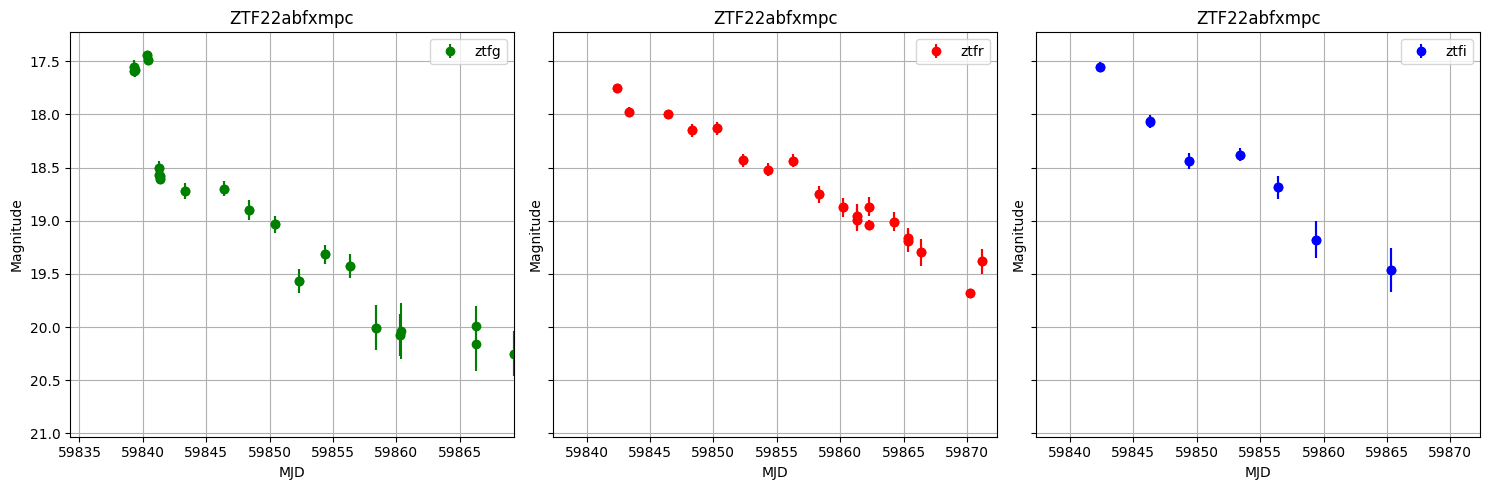

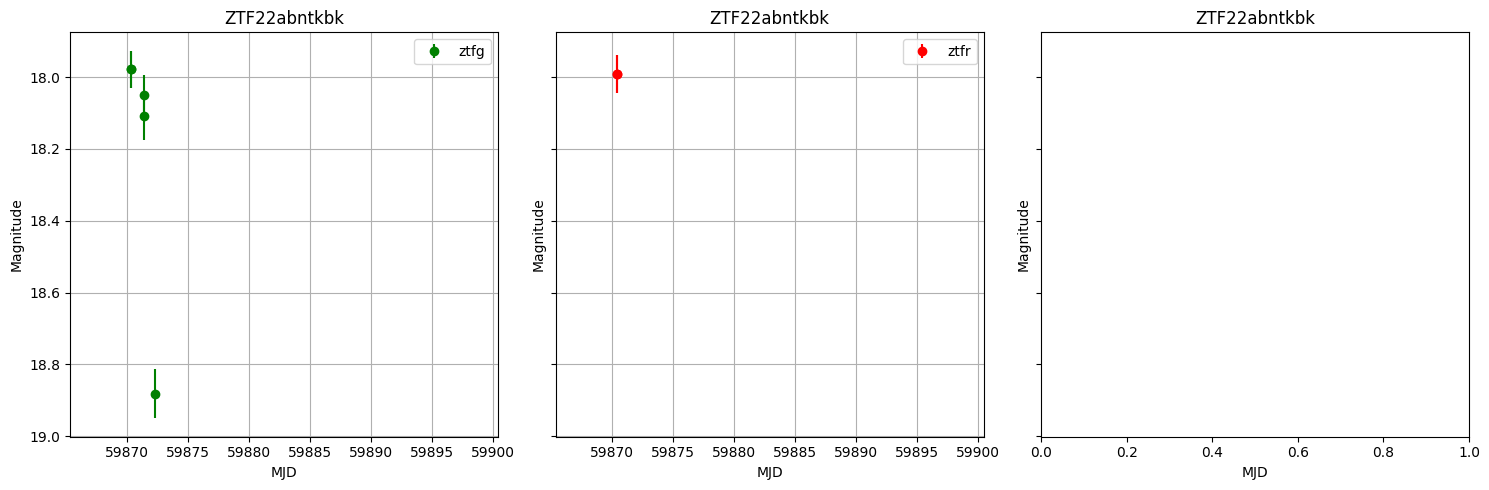

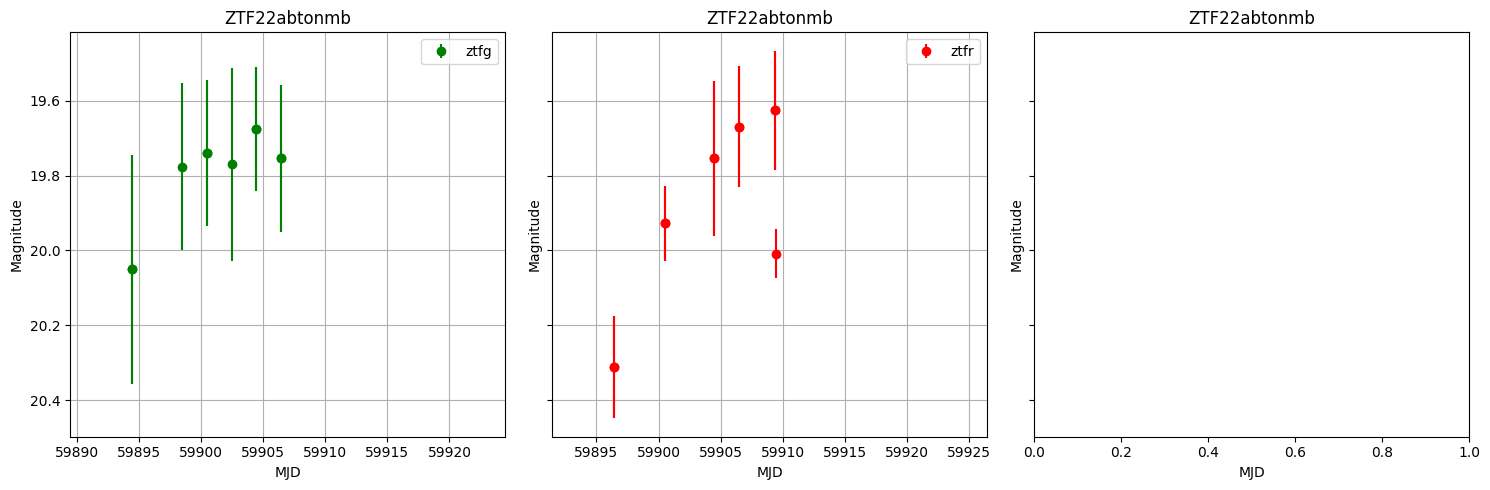

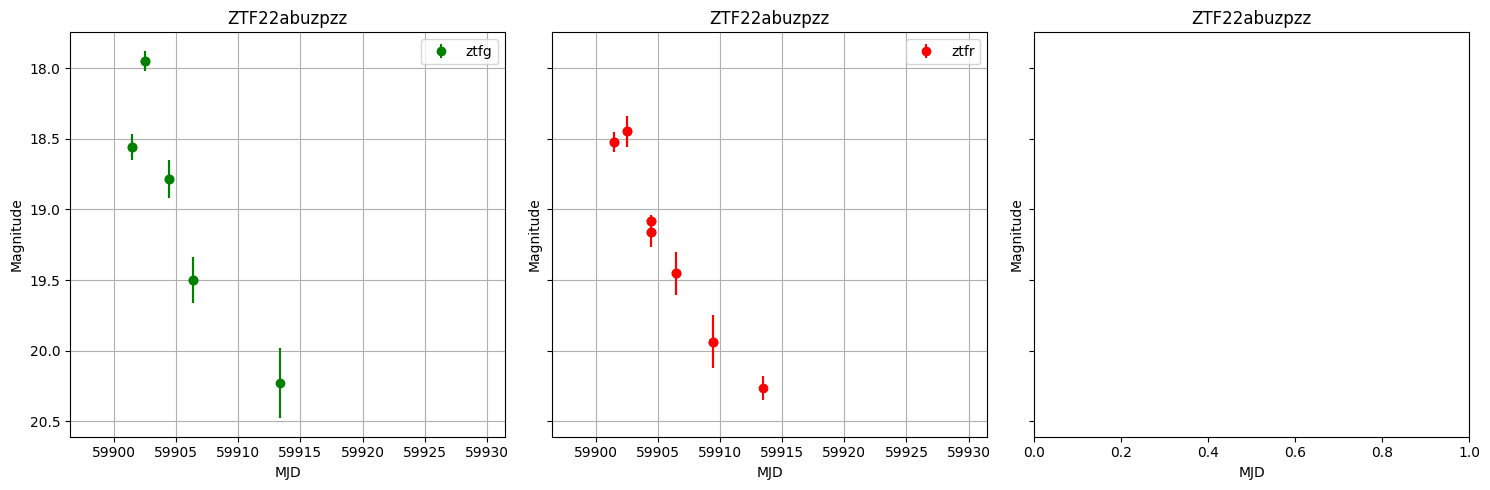

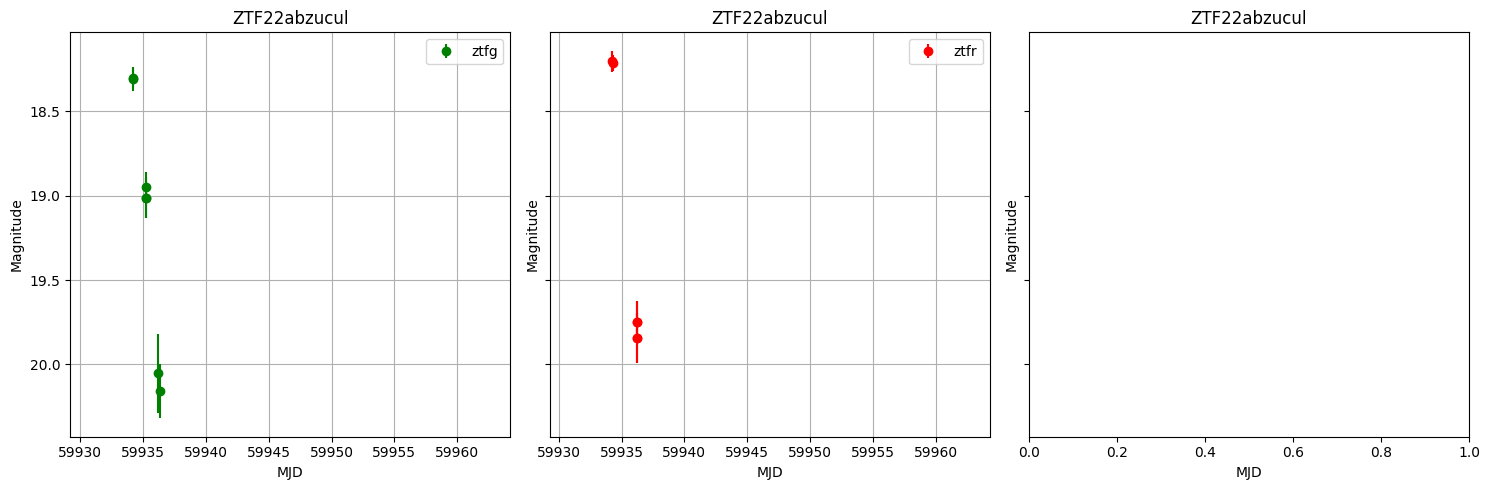

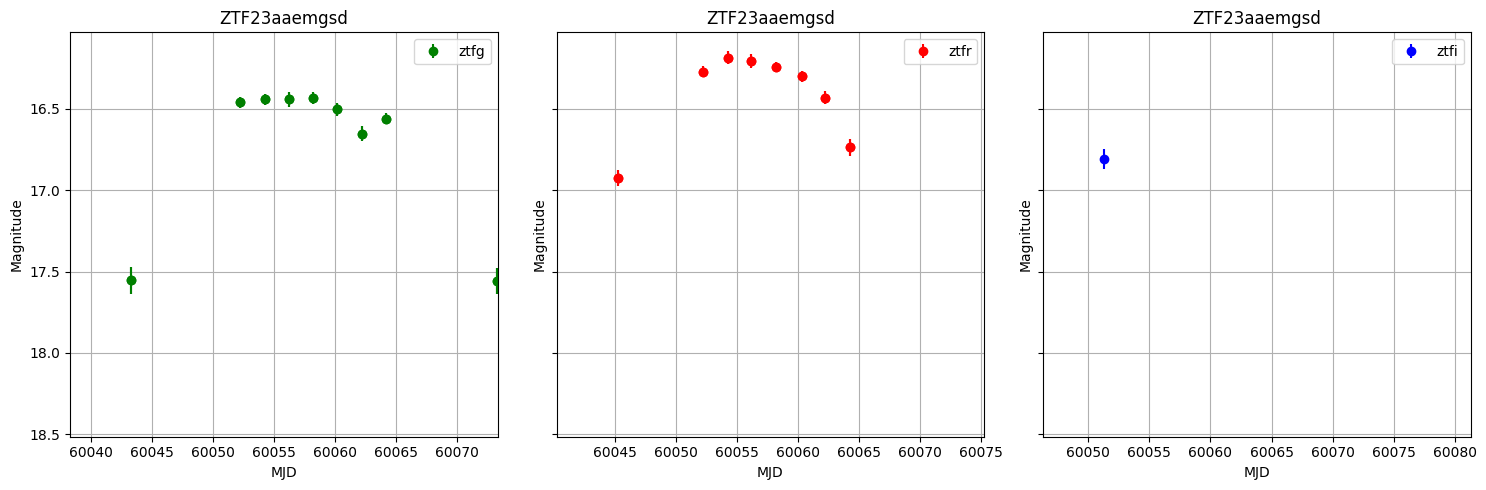

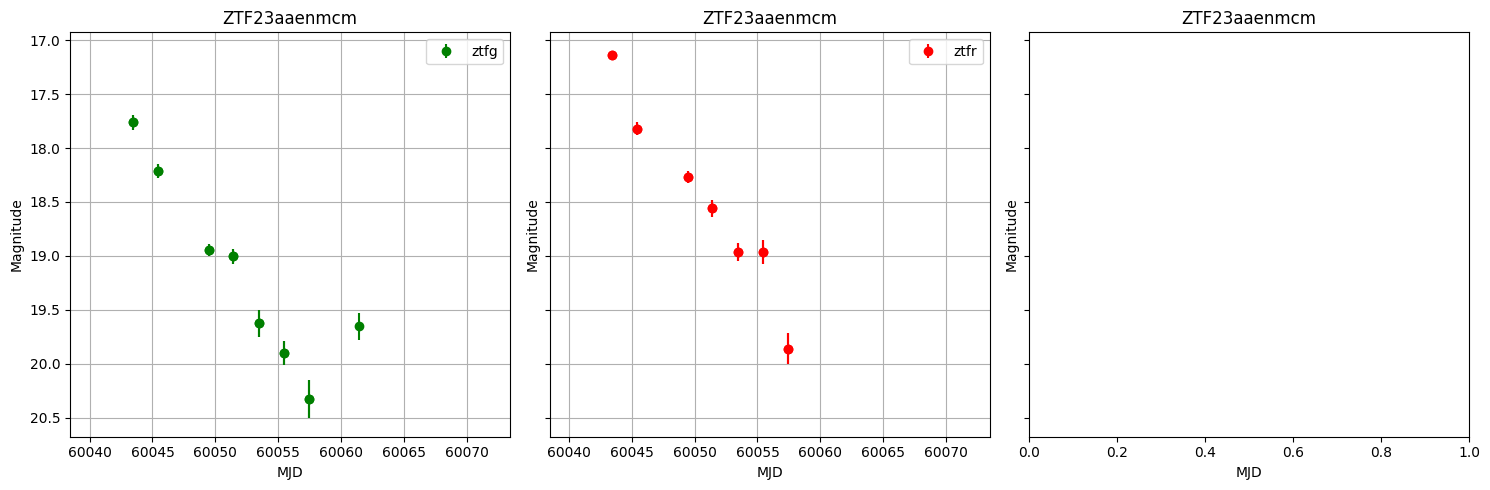

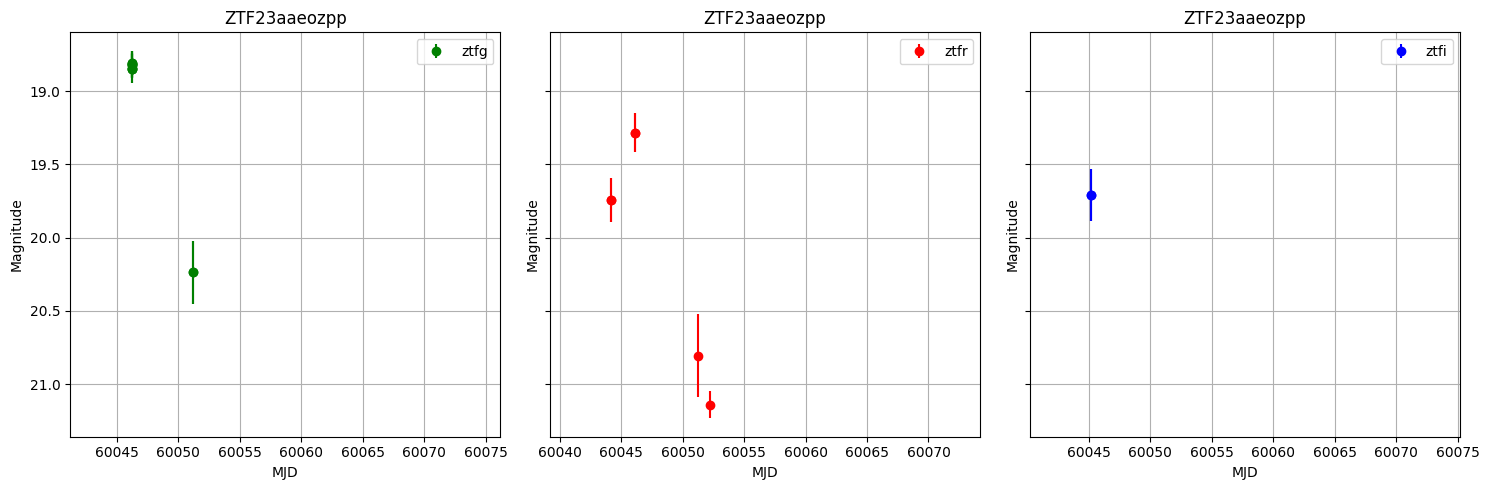

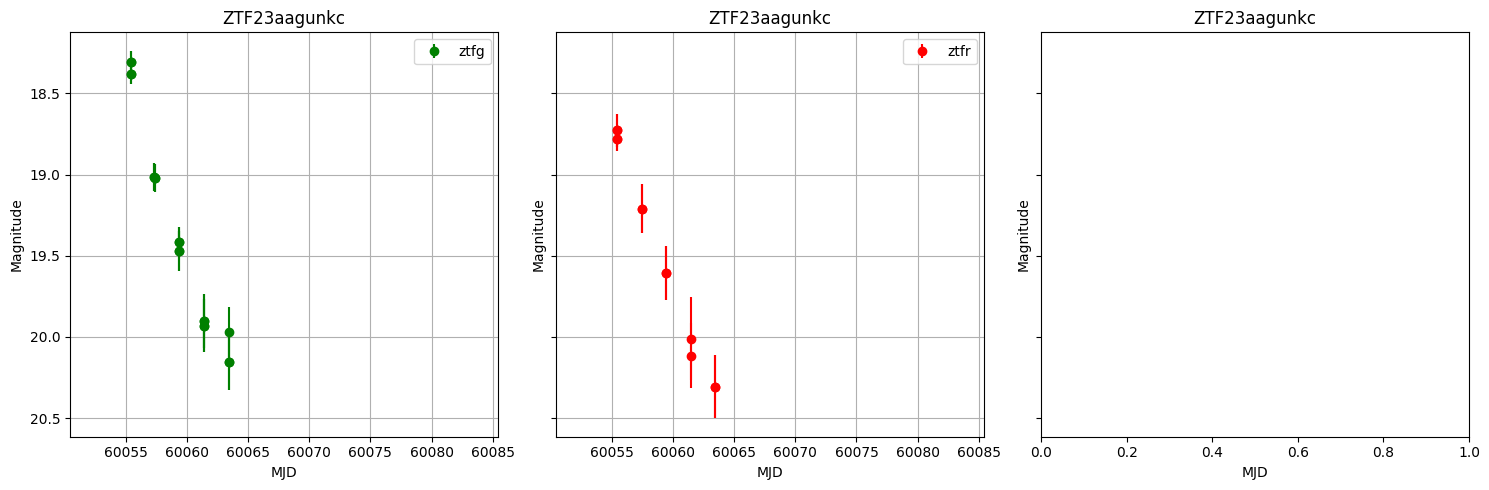

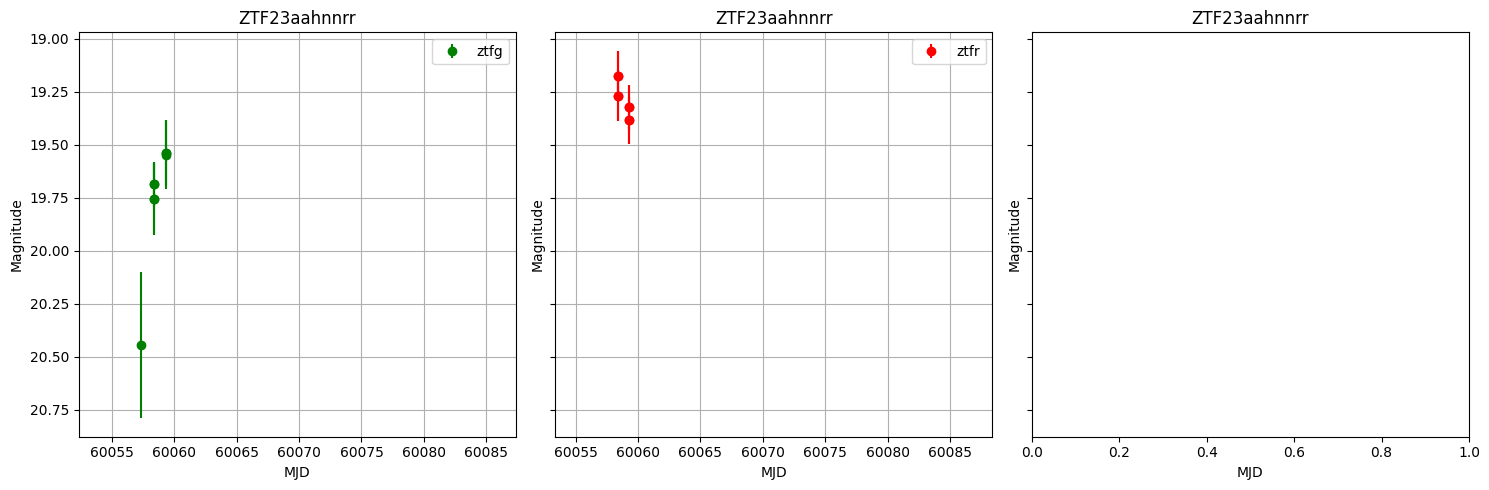

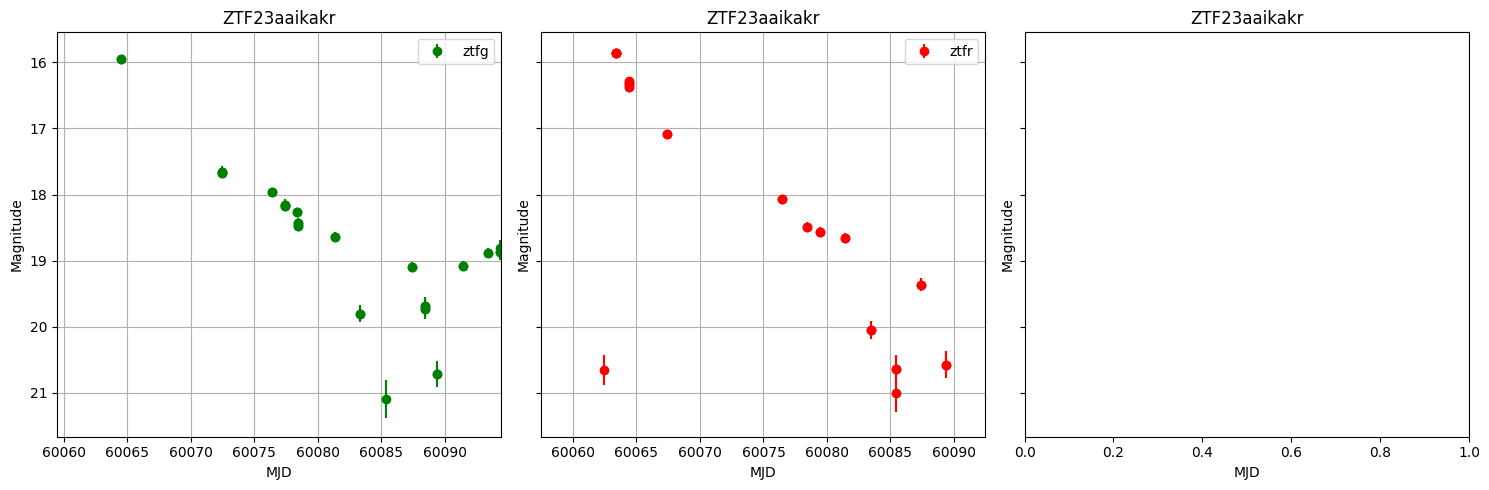

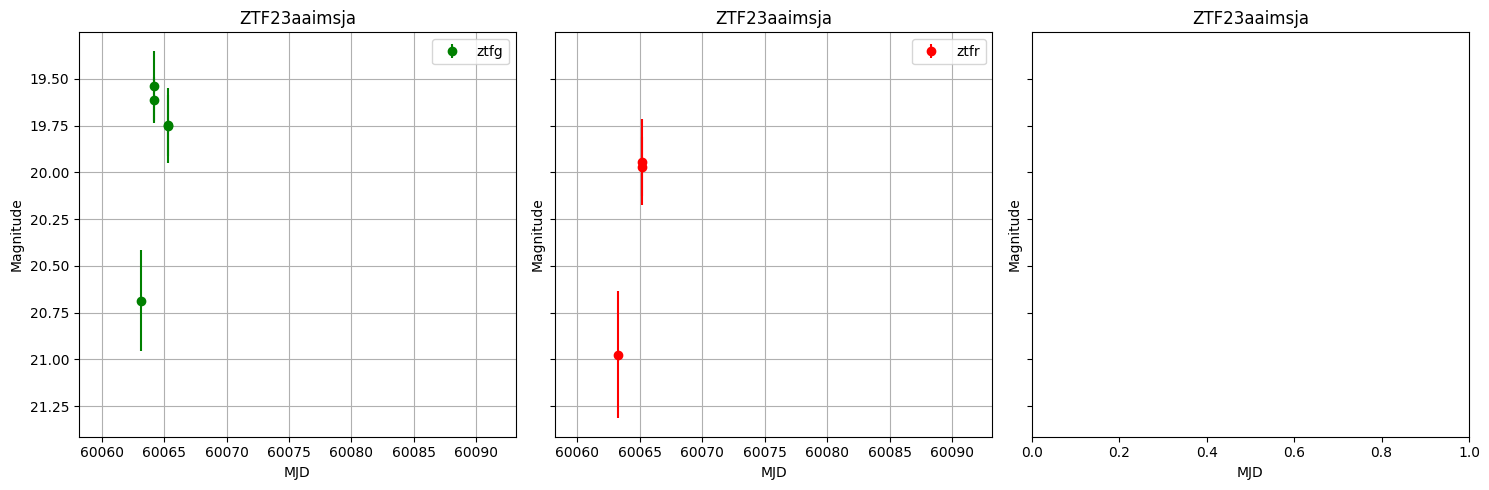

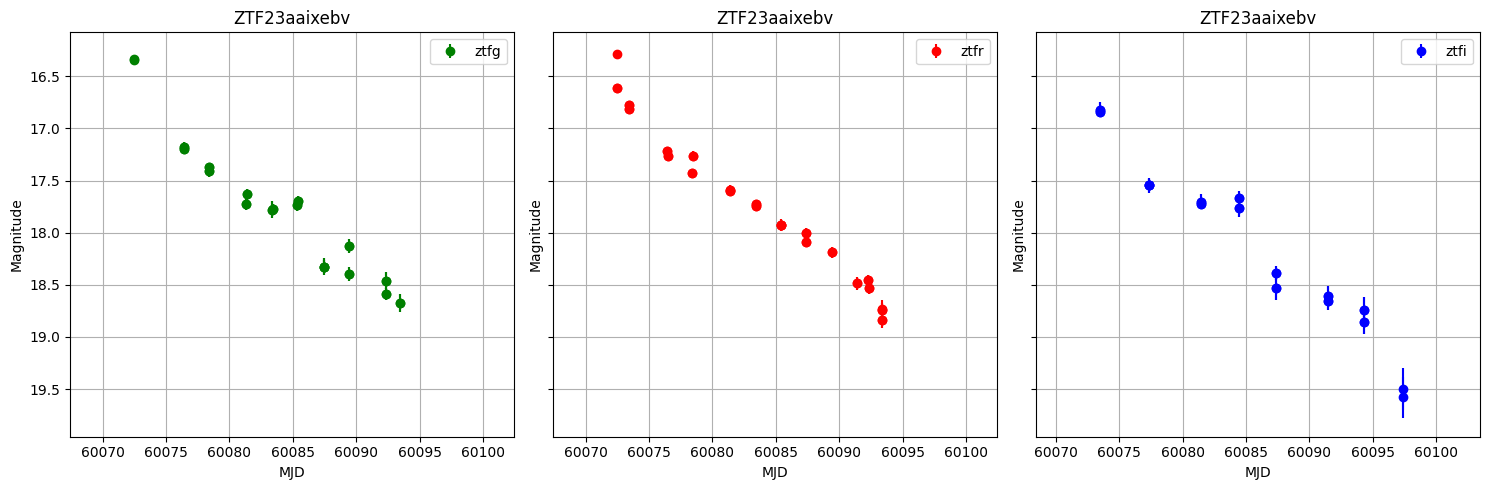

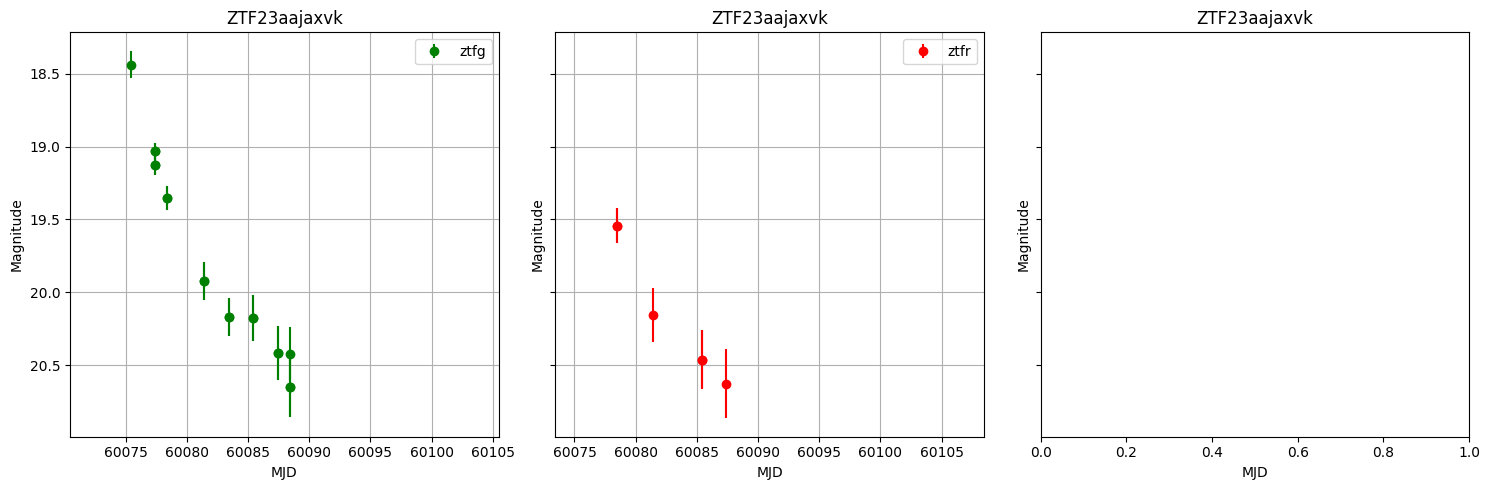

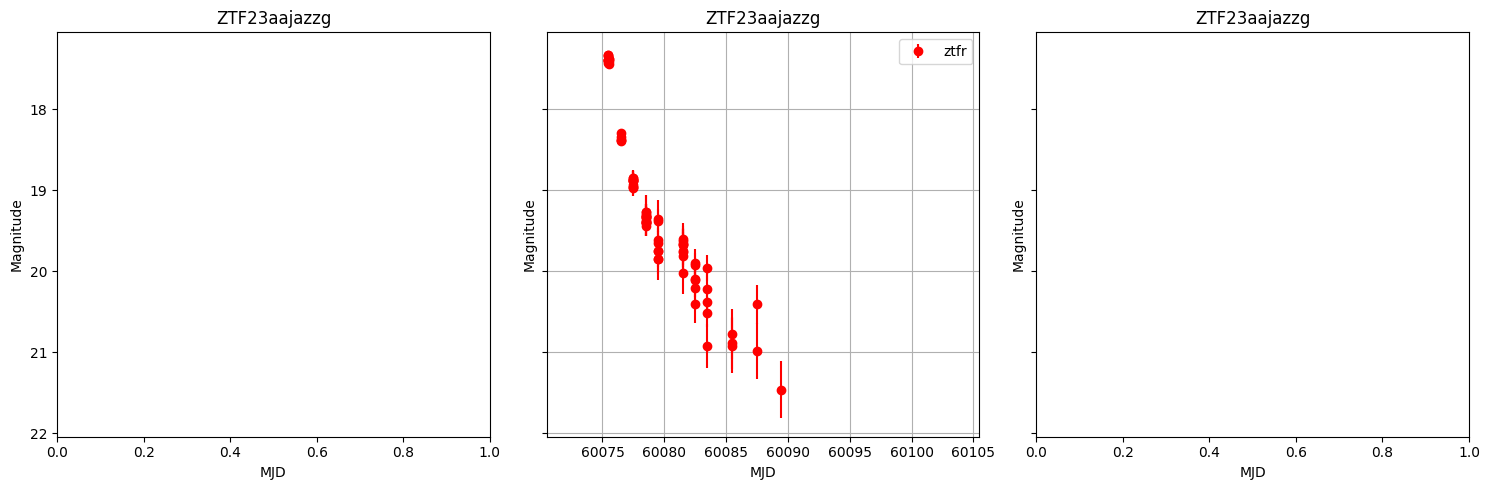

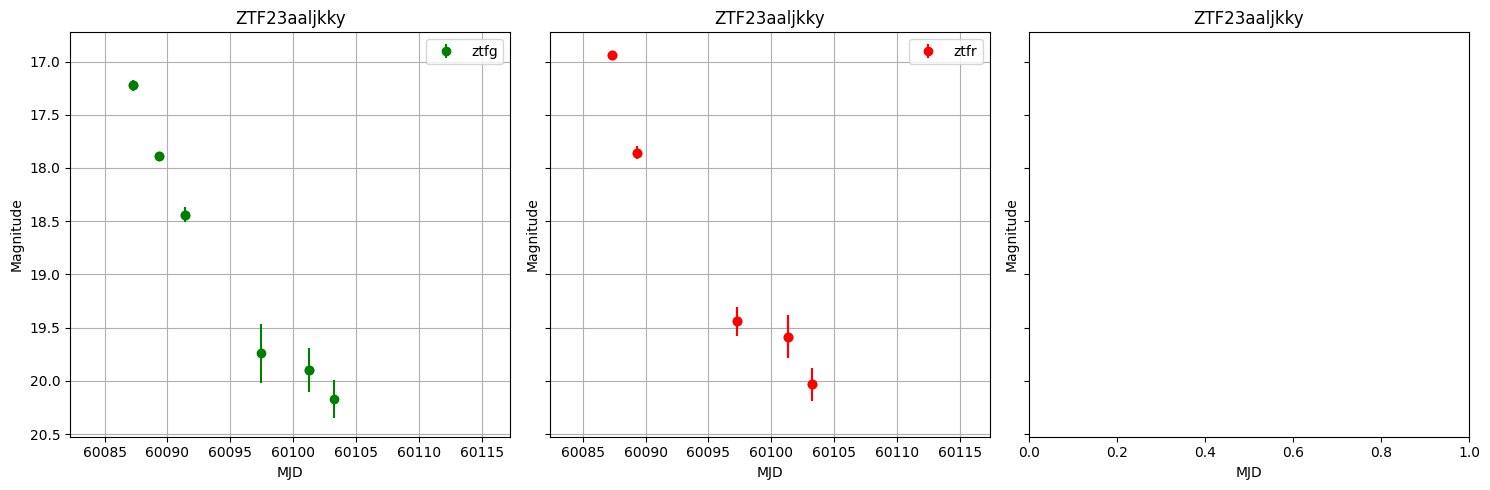

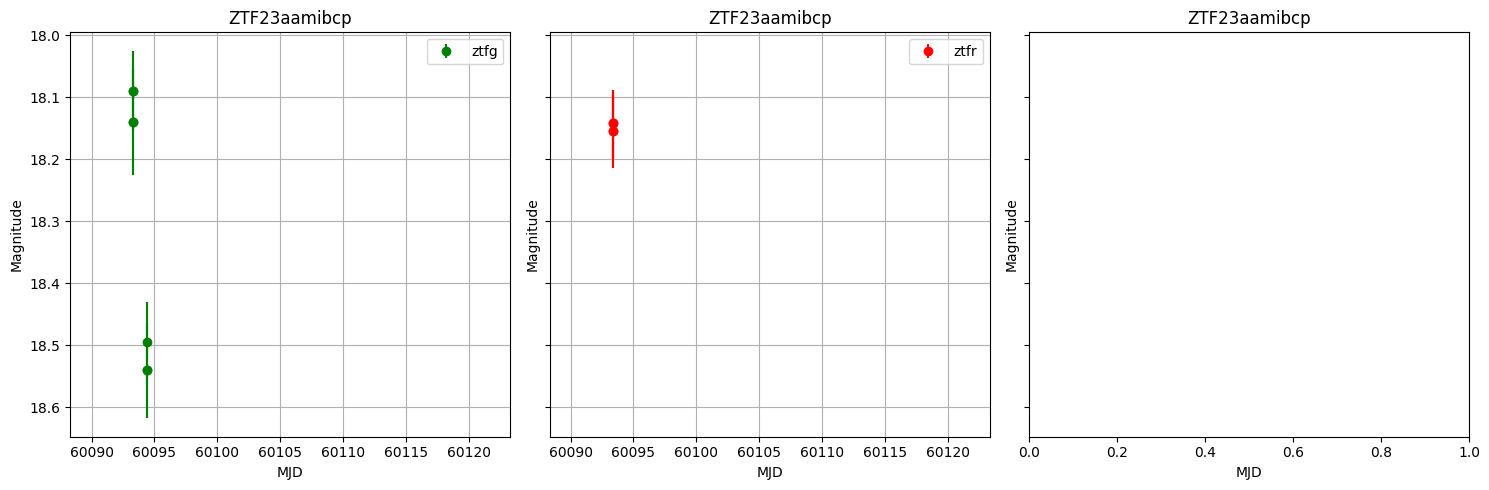

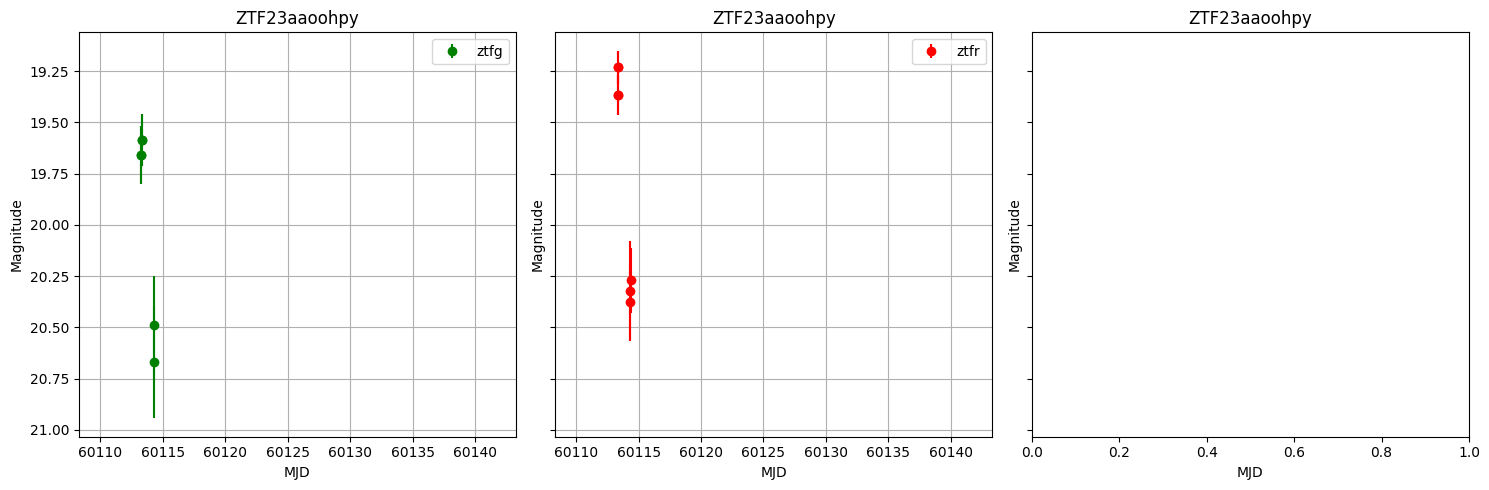

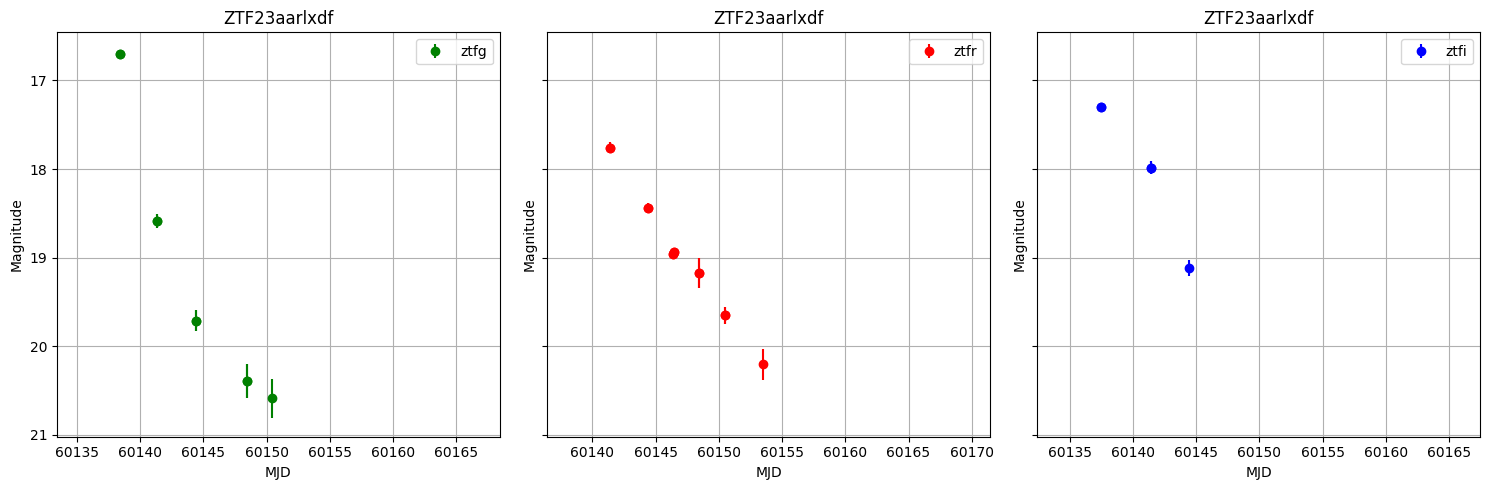

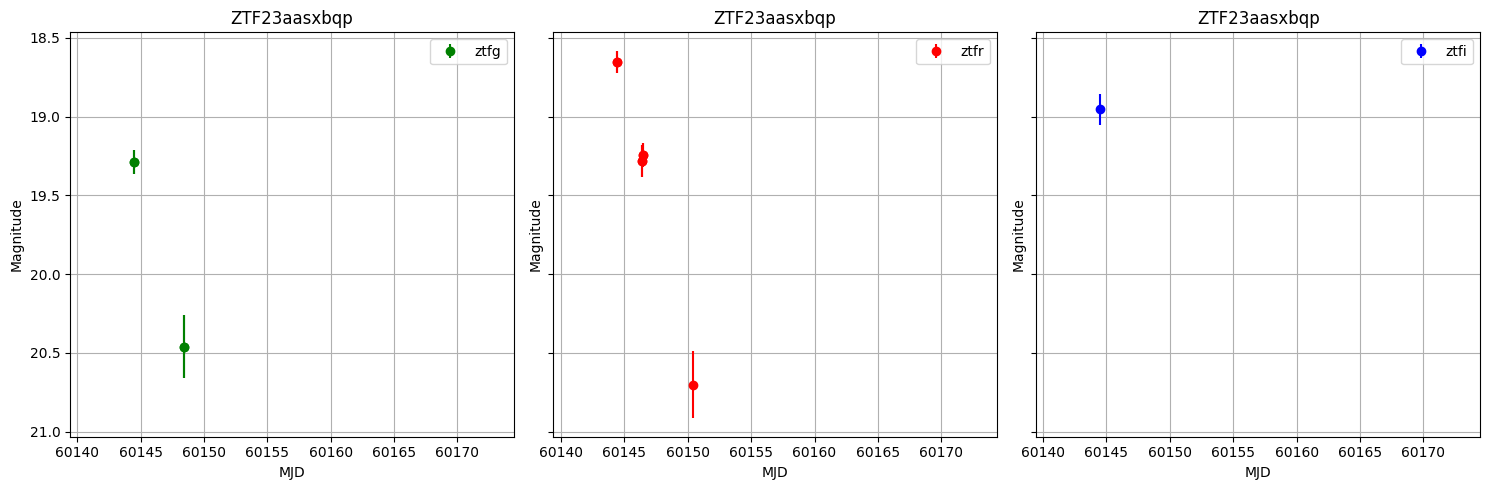

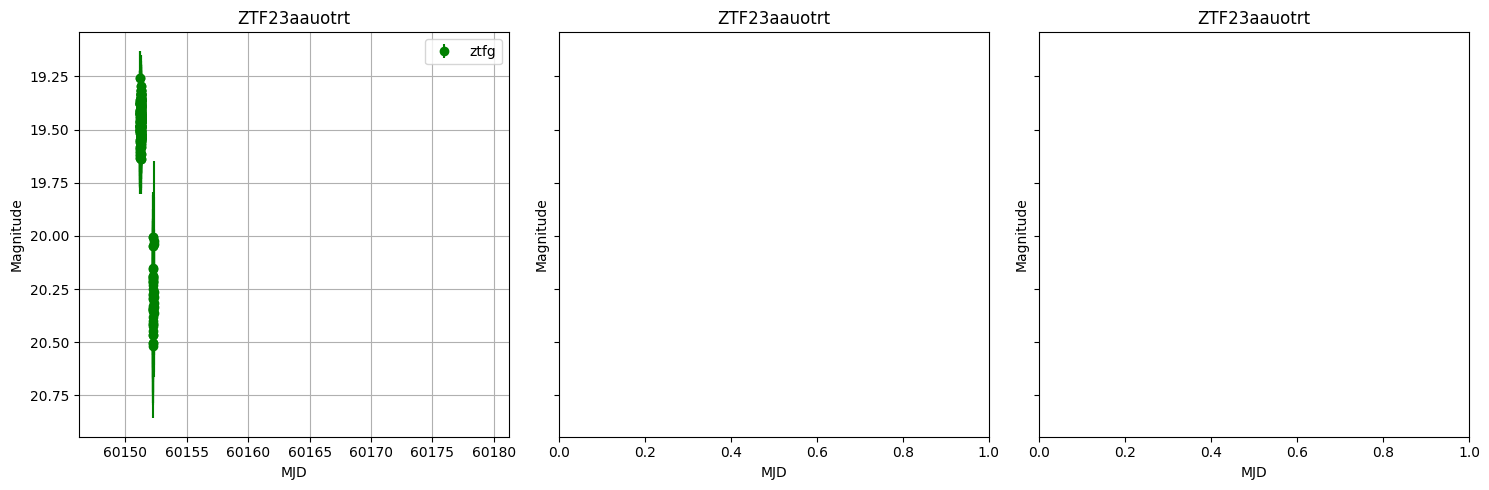

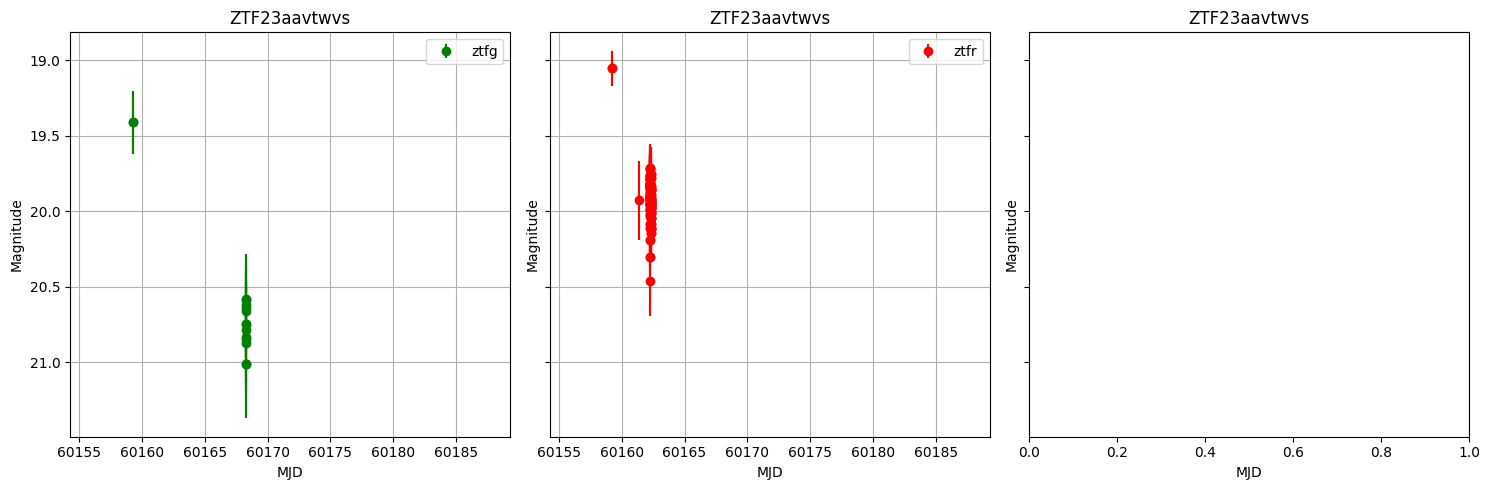

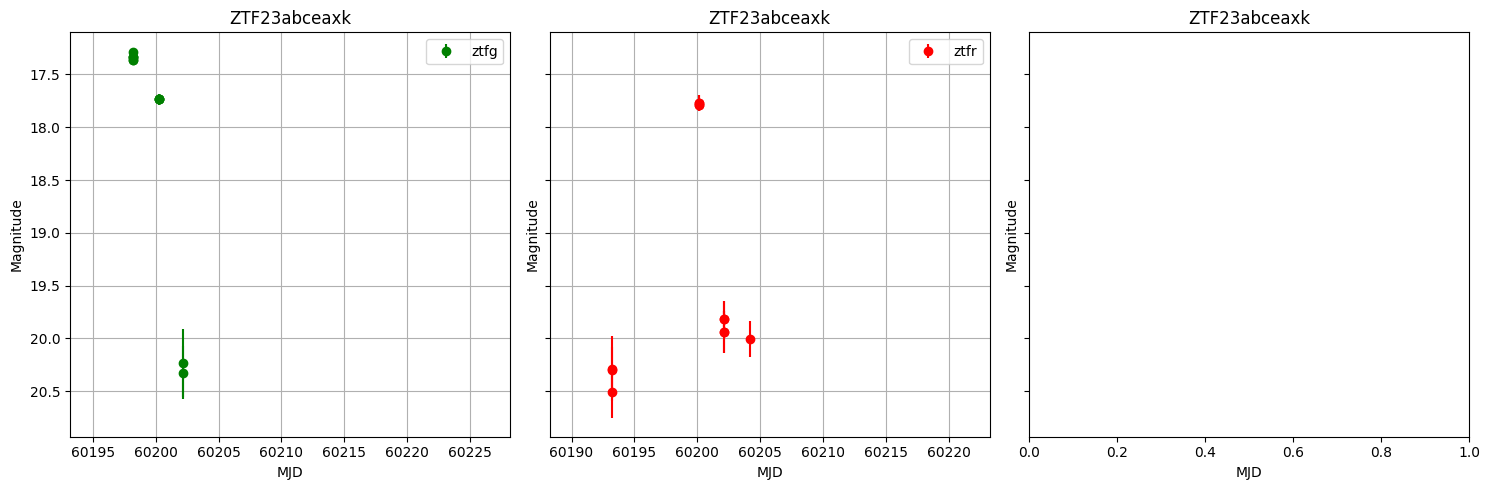

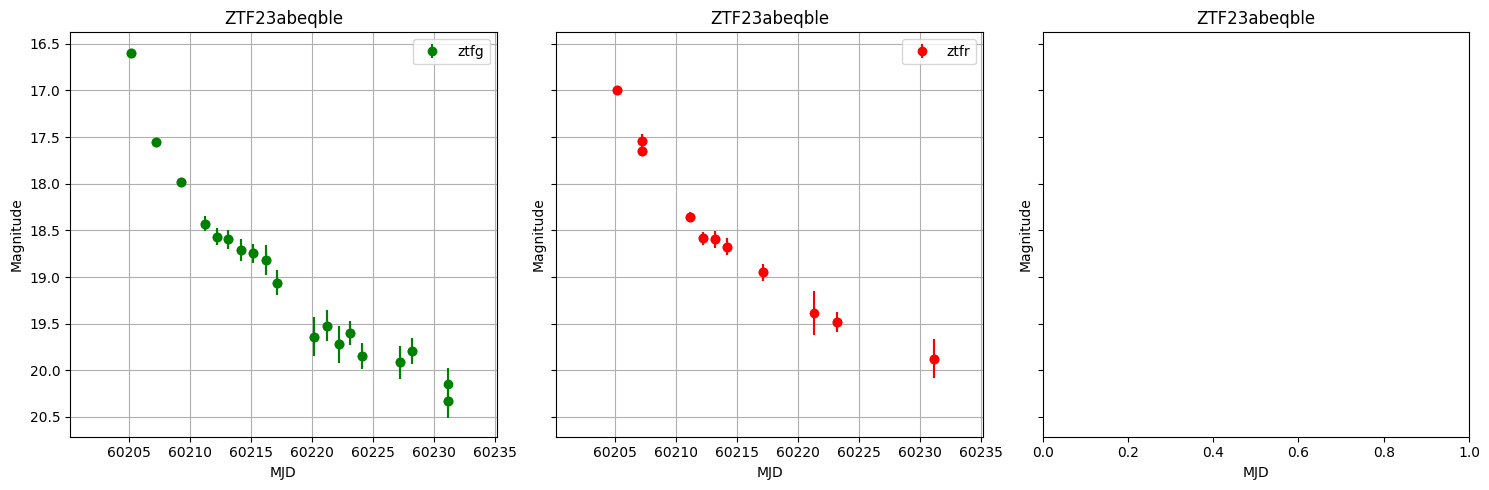

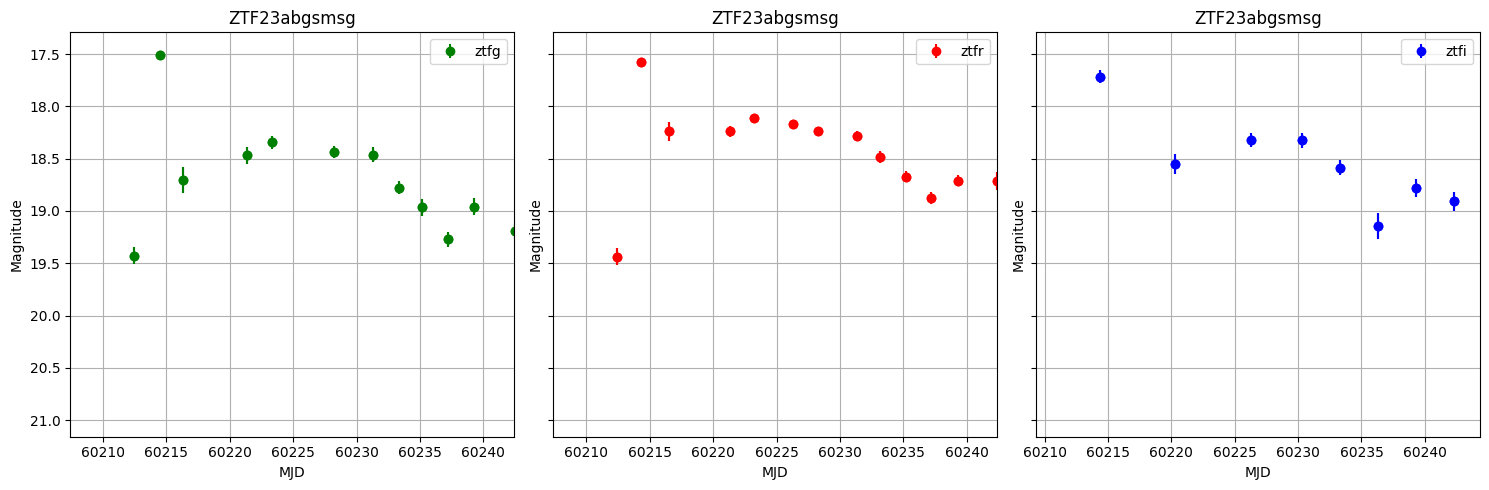

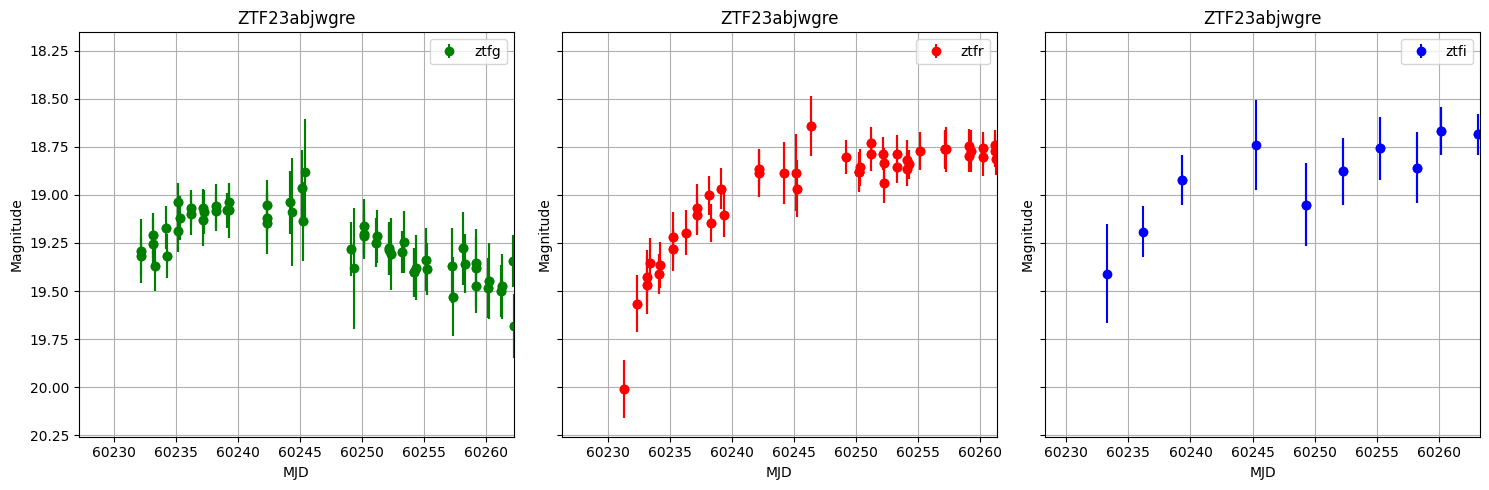

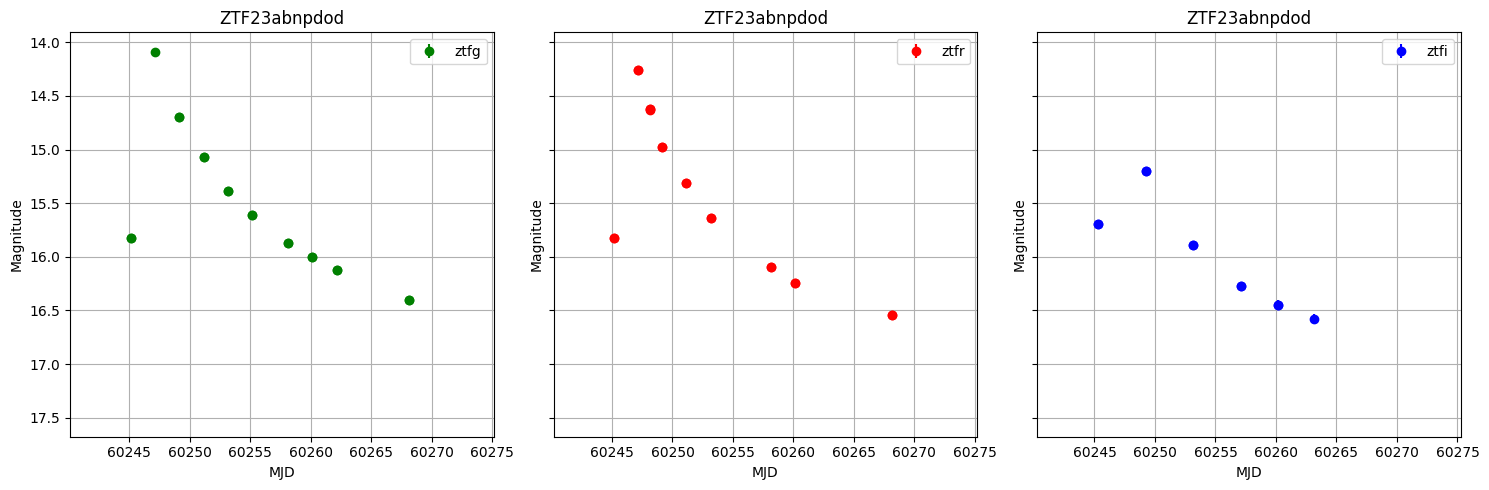

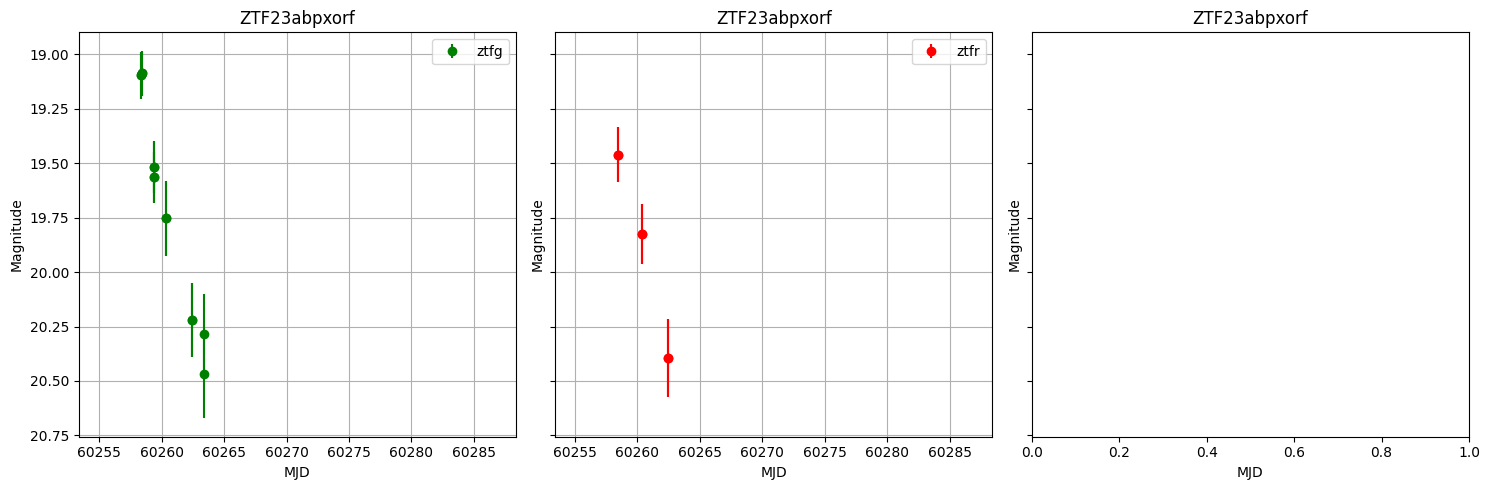

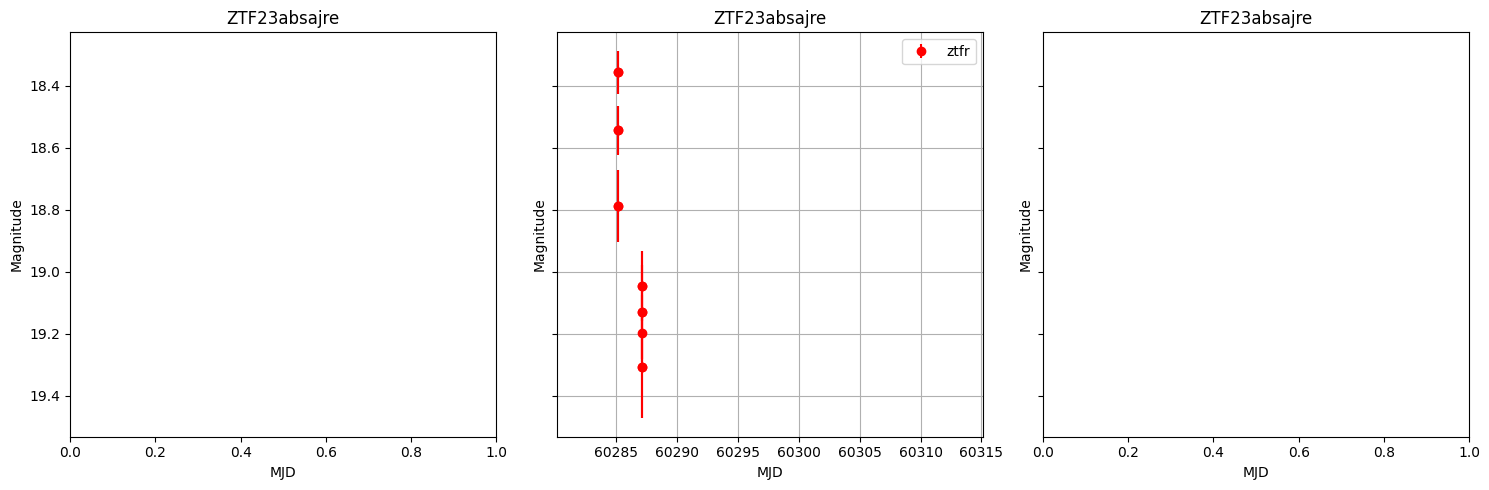

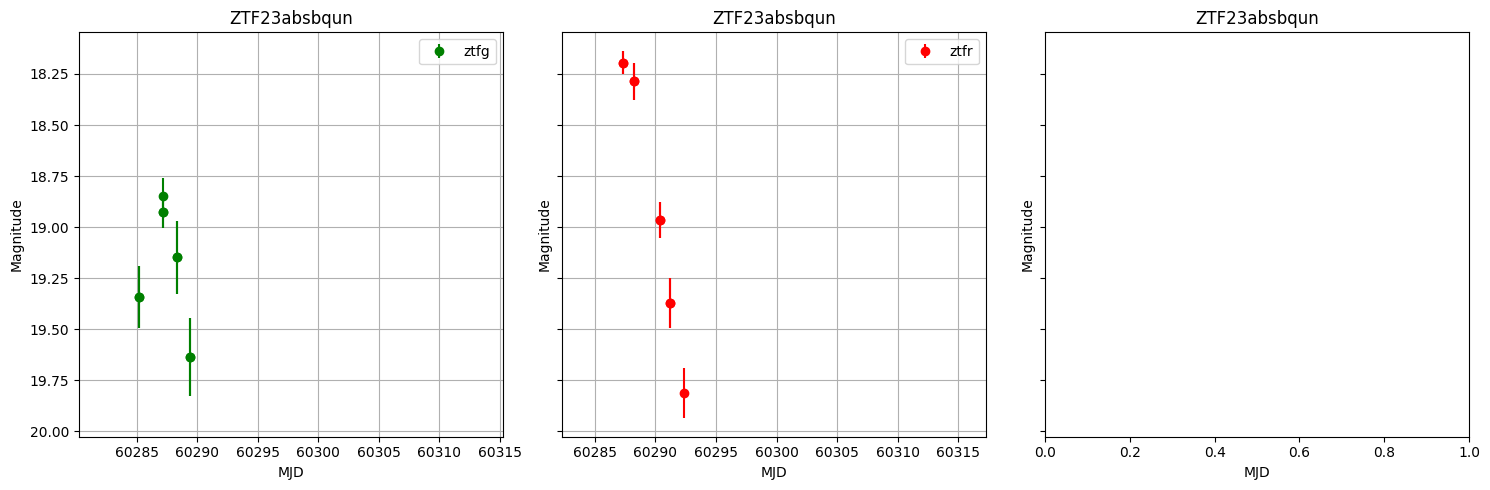

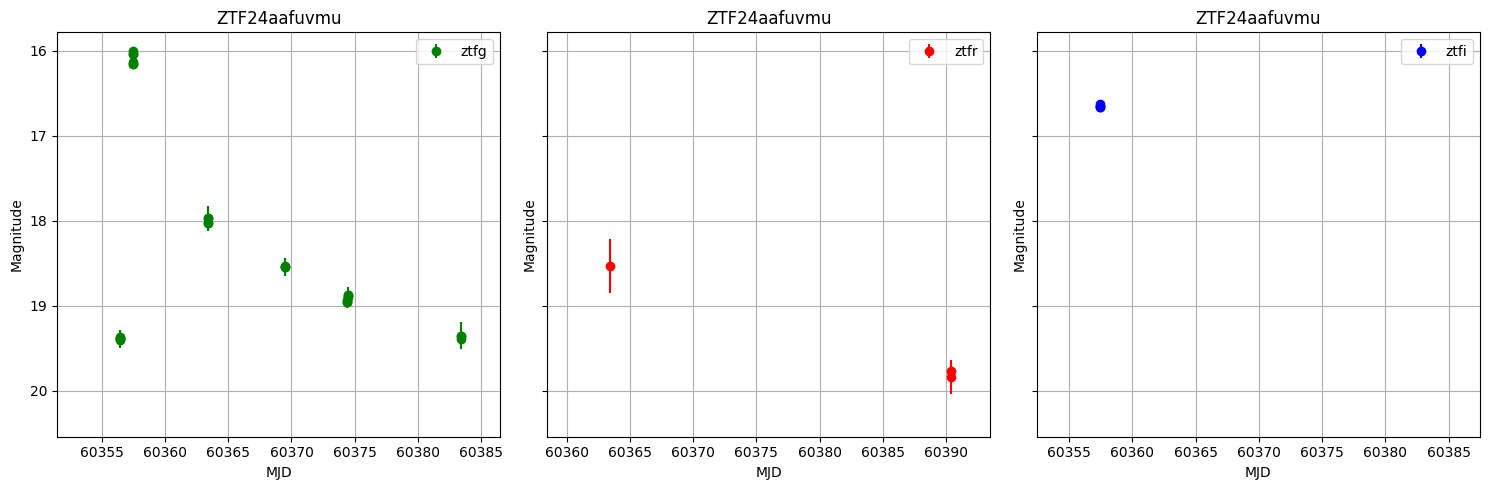

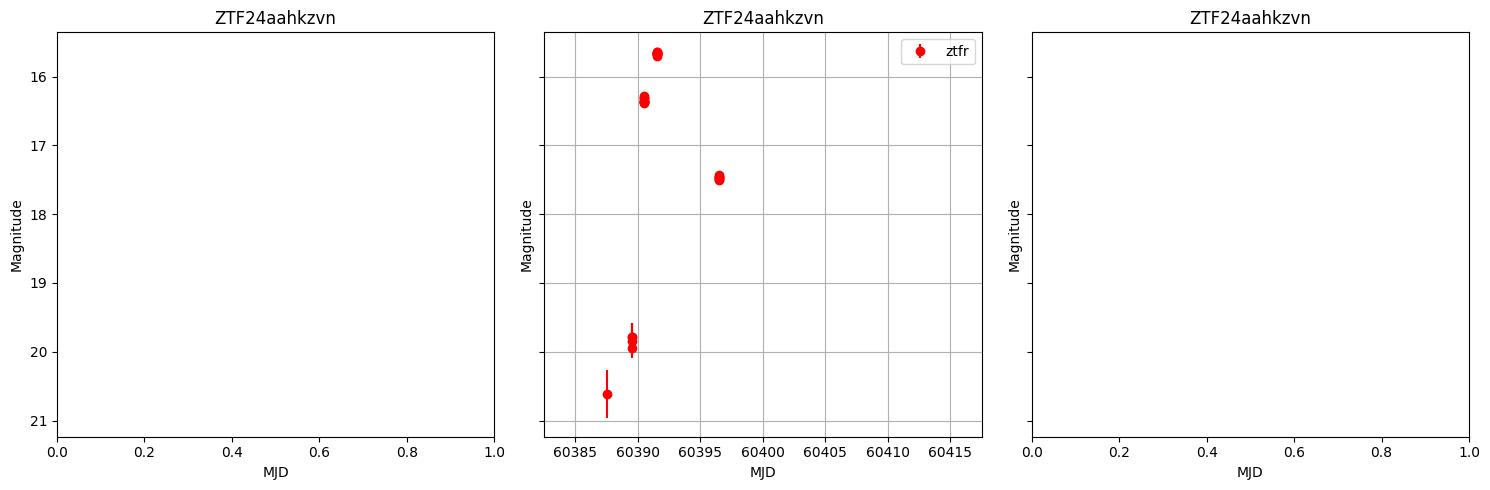

In [27]:
## plot each of the best candidates in a 1x3 grid for each, where each column is a different filter. each plot should have the lightcurve labeled
import matplotlib.pyplot as plt

for key, value in bflc_dict.items():
    color = {'ztfg': 'g', 'ztfr': 'r', 'ztfi': 'b'}
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    for i, (ax, filt) in enumerate(zip(axs, ['ztfg', 'ztfr', 'ztfi'])):
        filt_df = value[(value['filter'] == filt)  & (value['mag'].notnull())]
        ax.set_xlabel('MJD')
        ax.set_ylabel('Magnitude')
        ax.set_title(f'{key}')
        ax.invert_yaxis()
        if filt_df.empty:
            continue
        # display(filt_df)
        ax.errorbar(filt_df['mjd'], filt_df['mag'], yerr=filt_df['magerr'], fmt='o', label=filt, color=color[filt])
        ax.grid()
        ax.set_xlim(filt_df['mjd'].min()-5, filt_df['mjd'].min()+30)
        ax.legend()
    plt.tight_layout()
    plt.show()
